<a id="head"></a>
# Predicting Used Car Prices in the U.S.
### Assignment 1: INSY 695
### Oyundari Batbayar
****
The dataset is from [Kaggle](https://www.kaggle.com/austinreese/craigslist-carstrucks-data "Kaggle"), collected by [Austin Reese](https://www.kaggle.com/austinreese "austinreese"). which contains more than 500,000 used cars selling records in the US from [craigslist](http://craigslist.org/ "craigslist"). Special thanks to the Kaggle community for their advice on creating relevant visuals for this project.

This project's objective is to explore the dataset, uncover and discuss intriguing insights through data visualization, and employ machine learning models in a supervised learning context to accurately estimate the prices of used cars in the U.S., particularly focusing on vehicles not older than approximately 30 years.


## Table of Contents
1. [Problem Framing and Introduction](#1)
2. [Data Acquisition from Kaggle](#2)
3. [Data Exploration](#3)
   - [Importing libraries, loading dataset](#3.1)
   - [Analyze Missing Values](#3.2)
   - [Analyze Outliers](#3.3)
4. [Train Test Split](#4)
   - [Preprocessing Pipeline](#4.1)
5. [Data Visualization and Insights](#5)
6. [Model Selection and Hyperparameter Tuning](#6)
   - [Linear Regression](#6.1)
   - [Decision Tree Regressor](#6.2)
   - [Fine Tuning, Random Forest Regressor)](#6.3)
   - [Analyzing Best Model and its Errors](#6.4)
7. [Model Evaluation and Project Conclusion](#7)
   - [Performance on the Test Set](#7.1)
   - [Results Interpretation and Explainability](#7.2)
   - [Future Work and Improvement](#7.3)



The above bullet points have been crafted following the Data Science Lifecycle from Class Slides: 
Framing the Problem
Data Acquisition
Data Exploration
Data Preparation
Modeling
Model Fine-Tuning
Solution Presentation
Context
Hypothesis
Data
Model
Results
Explainability of Results
Threats to Validity
Conclusion
Lessons Learned and Next Steps

<a id="1"></a>
### 1. Problem Framing and Introduction
[Back to top](#head)

The aim of this project is to develop a predictive model that estimates the market value of used cars based on a range of features. By analyzing historical sales data, I seek to understand how various attributes, such as a car's age, make, and condition, influence its price. This model can serve as a valuable tool for various stakeholders in the automotive industry, including dealerships, private sellers, and buyers, enabling them to make informed decisions by estimating a car's worth.

<a id="2"></a>
### 2. Data Acquisition from Kaggle
[Back to top](#head)


The dataset is from [Kaggle](https://www.kaggle.com/austinreese/craigslist-carstrucks-data "Kaggle"), collected by [Austin Reese](https://www.kaggle.com/austinreese "austinreese"). which contains more than 500,000 used cars selling records in the US from [craigslist](http://craigslist.org/ "craigslist").

<a id="3"></a>
### 3. Data Exploration
[Back to top](#head)
   - [Importing libraries, loading dataset,and taking a quick look at it](#3.1)
   - [Observing Missing Values](#3.2)
   - [Analyzing Outliers](#3.3)
   - [Data Cleaning](#3.4)

<a id="3.1"></a>
### 3.1 Importing libraries, loading dataset,and taking a quick look at it
[Back to top](#head)

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from joblib import dump, load

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import IsolationForest

**Load the dataset**

In [2]:
def load_df(file_path):
    csv_path = Path(file_path)
    if not csv_path.is_file():
        print("File not found!")
        return None
    return pd.read_csv(csv_path)

# insert file path here
file_path = r"C:\Users\oyund\OneDrive\Desktop\vehicles.csv"
df = load_df(file_path)

**Taking a quick look at the data**

In [3]:
df.head()

id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
1          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
2          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
3          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
4          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   

  image_url description county state lat long posting_date  
0       NaN         NaN    NaN    az NaN  NaN          NaN  
1       NaN         NaN    NaN    ar NaN  NaN          NaN  
2       NaN         NaN    NaN    fl NaN  NaN          NaN  
3       NaN         NaN    NaN    ma NaN  NaN          NaN  
4       NaN         NaN    NaN    nc NaN  NaN          NaN  

[5 rows x 26 columns]

In [4]:
df.info()
# 426880 entries, 26 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

**Checking for Duplicates**

In [5]:
# In case there are duplicates
def remove_duplicates(df, subset=None):
    if df.duplicated(subset=subset).any():
        return df.drop_duplicates(subset=subset)
    else:
        return df

df = remove_duplicates(df, subset = ['id'])
df.shape

(426880, 26)

**Limiting Scope to the Purpose of the Study**


In [6]:
df = df[df['year']>1990]

In [7]:
us_lat_min, us_lat_max = 24.396308, 49.384358  # Adjust as needed
us_long_min, us_long_max = -125.000000, -66.934570  # Adjust as needed

# Filter DataFrame for rows where latitude and longitude are within US boundaries
df = df[(df['lat'] >= us_lat_min) & (df['lat'] <= us_lat_max) &
           (df['long'] >= us_long_min) & (df['long'] <= us_long_max)]

<Axes: title={'center': 'Geographical distribution of the cars colored by prices'}, xlabel='long', ylabel='lat'>

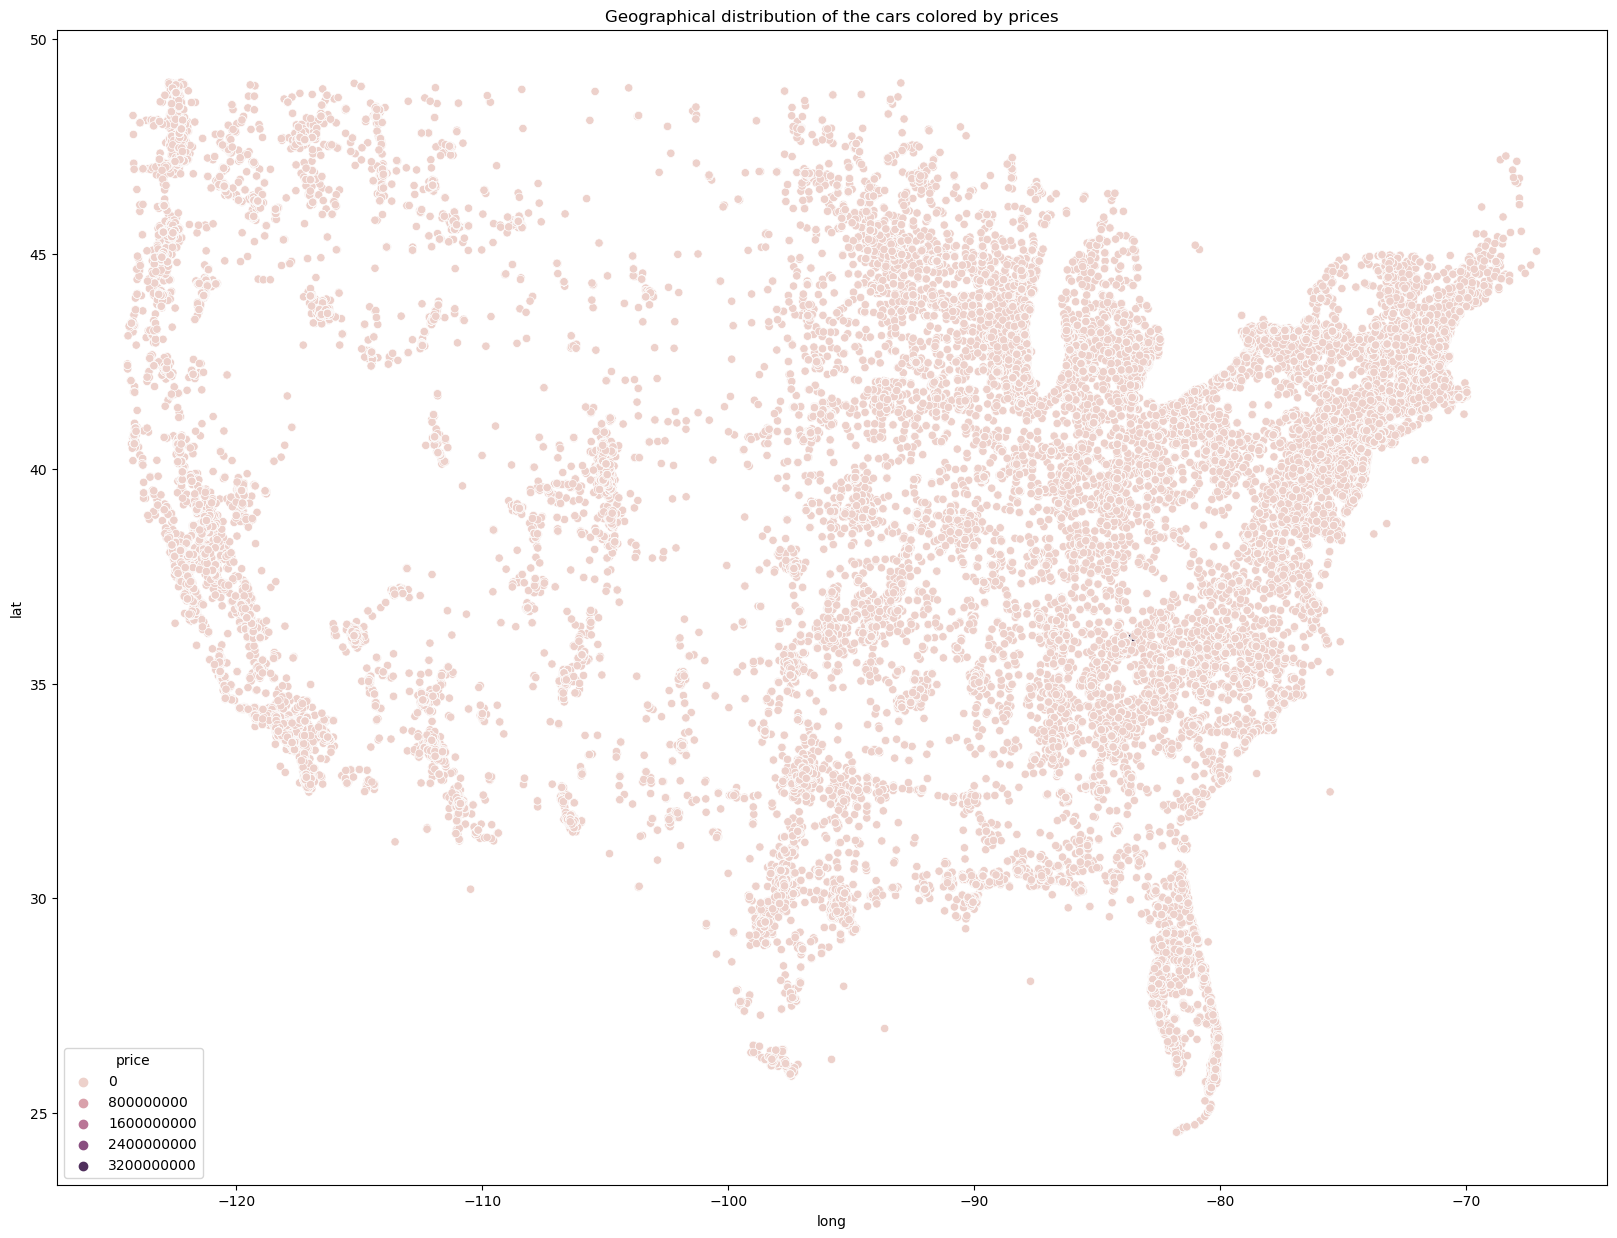

In [8]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Geographical distribution of the cars colored by prices')
sns.scatterplot(x= 'long', y='lat', data = df, hue = 'price', ax=ax )

<a id="3.2"></a>
### 3.2 Observing Missing Values
[Back to top](#head)

In [9]:
def missing_values_summary(df):
    missing_count = df.isnull().sum()  # the count of missing values
    missing_percent = (missing_count / len(df)) * 100  # the percentage of missing values
    missing_summary = pd.DataFrame({'Count': missing_count, 'Percentage': missing_percent})
    return missing_summary[missing_summary['Count'] > 0]  # filter out non-missing columns for display

missing_summary = missing_values_summary(df)
print(missing_summary)

               Count  Percentage
manufacturer   13820    3.455631
model           3965    0.991431
condition     159572   39.900282
cylinders     170084   42.528761
fuel            2551    0.637866
odometer        4275    1.068945
title_status    7823    1.956107
transmission    2365    0.591358
VIN           143856   35.970565
drive         122655   30.669347
size          290864   72.729273
type           85817   21.458166
paint_color   123170   30.798121
description        2    0.000500
county        399927  100.000000


**Observations:**

* County column is empty. Consider removing. 
* Columns - size, cylinders, VIN, drive, size, paint_color, and type - have significant portion of their observations missing. 

<a id="3.3"></a>
### 3.3 Analyzing Outliers
[Back to top](#head)

In [10]:
df.describe()

id         price           year      odometer  county  \
count  3.999270e+05  3.999270e+05  399927.000000  3.956520e+05     0.0   
mean   7.311475e+09  7.001369e+04    2012.449347  9.724084e+04     NaN   
std    4.389163e+06  1.218567e+07       5.718711  1.668576e+05     NaN   
min    7.301583e+09  0.000000e+00    1991.000000  0.000000e+00     NaN   
25%    7.308082e+09  5.988000e+03    2009.000000  3.887200e+04     NaN   
50%    7.312557e+09  1.398800e+04    2014.000000  8.750000e+04     NaN   
75%    7.315246e+09  2.659000e+04    2017.000000  1.354260e+05     NaN   
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07     NaN   

                 lat           long  
count  399927.000000  399927.000000  
mean       38.441851     -93.815700  
std         5.249665      16.855576  
min        24.555200    -124.426300  
25%        34.758445    -110.960560  
50%        39.150700     -87.988472  
75%        42.354200     -80.690000  
max        48.999990     -67.143300

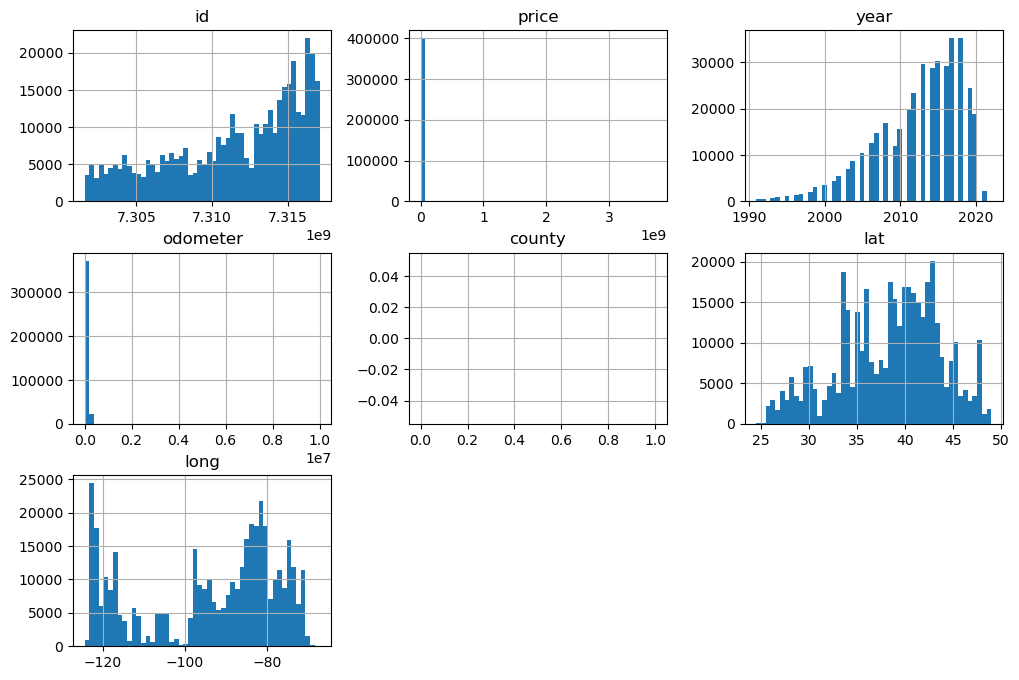

In [11]:
# Plotting histograms for numerical attributes
df.hist(bins=50, figsize=(12,8))
plt.show()

**Observations:**

* County is empty. Consider removing. 
* Price and odometer being very tall bars signify it is very skewed and there might be outliers.
* Year, latitude, and longitude are also very skewed. 


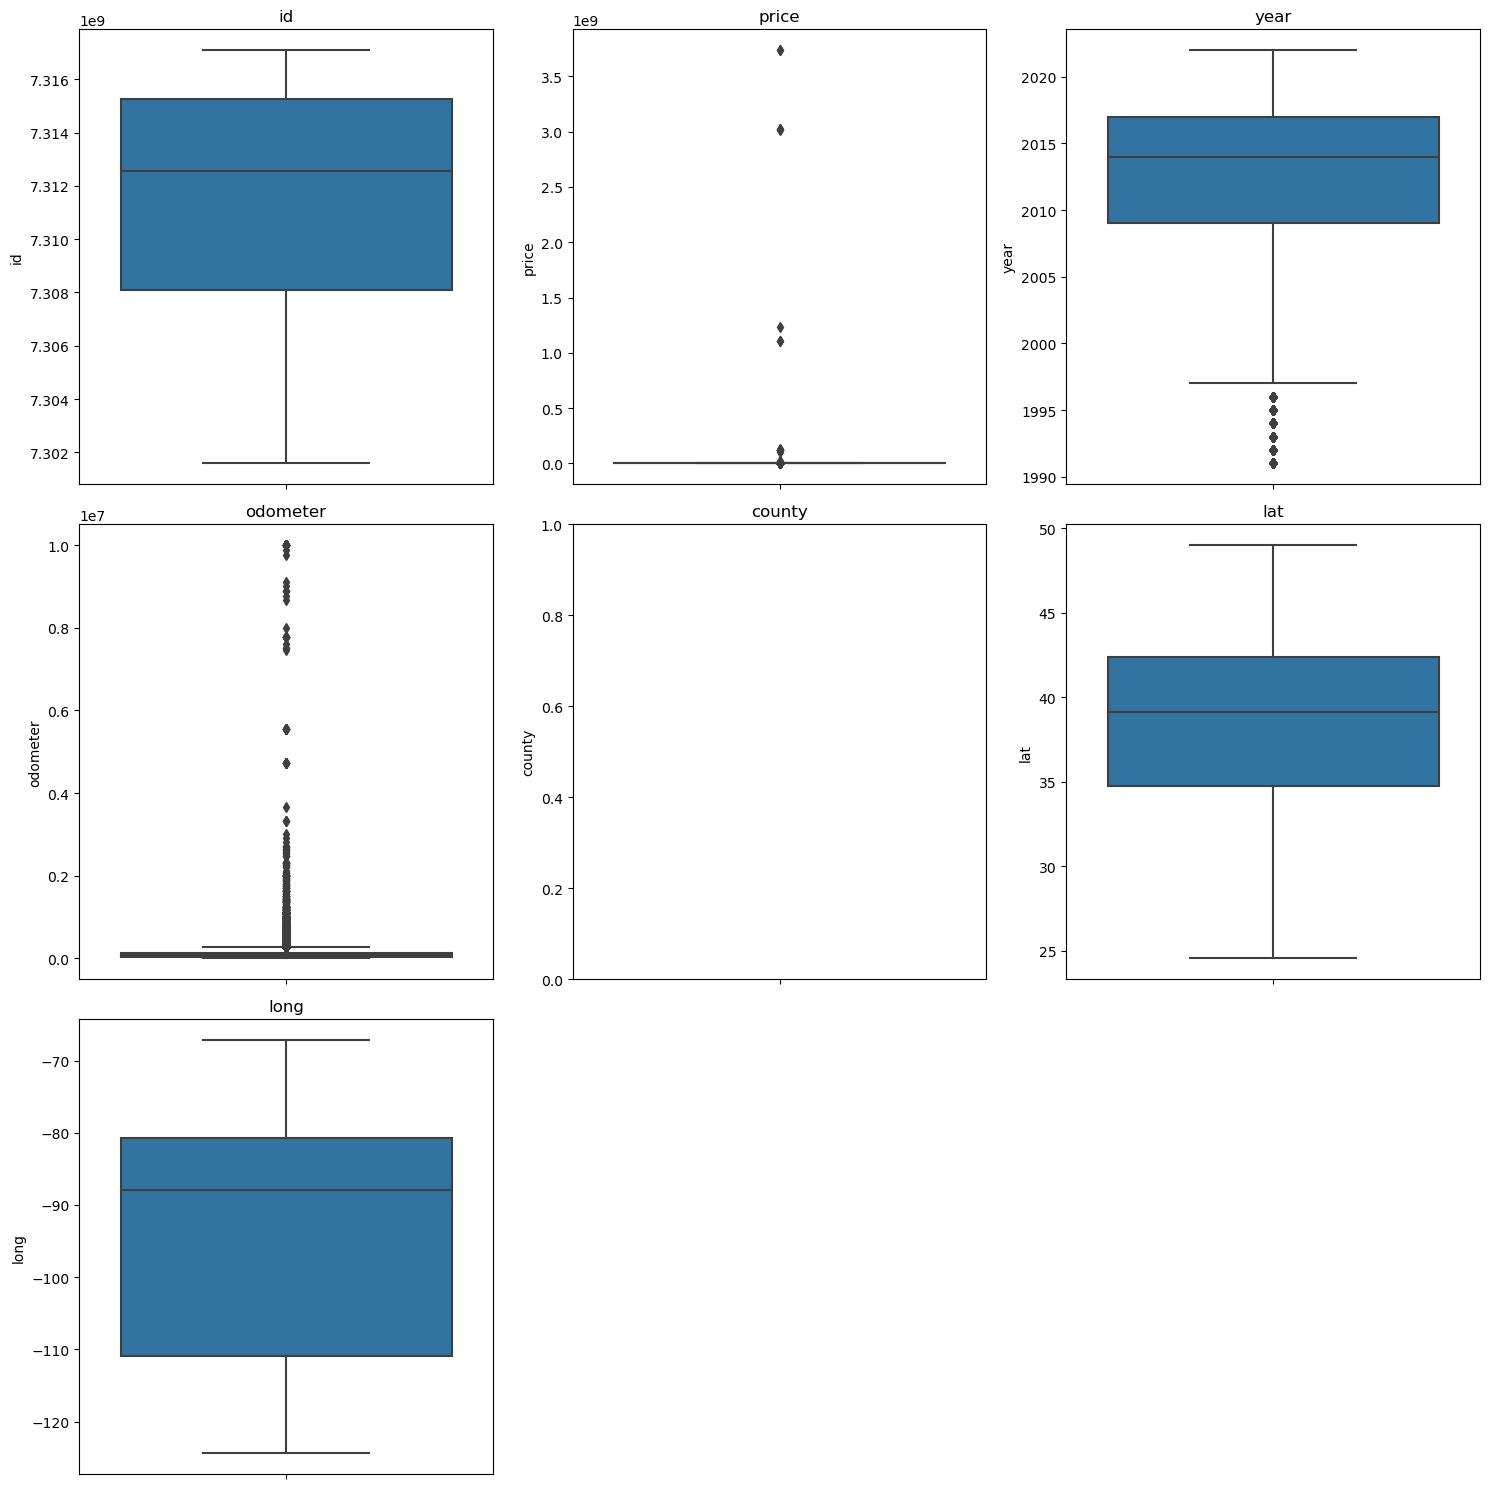

In [12]:
# Since there are some tall bars in the histogram, now let's also try plotting boxplots to see the distribution.
import seaborn as sns
import numpy as np

def plot_boxplots(df):
    num_columns = df.select_dtypes(include=['number']).columns
    num_plots = len(num_columns)
    grid_size = int(np.ceil(np.sqrt(num_plots)))
    
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size*5, grid_size*5))
    axes = axes.flatten() 

    for i, col in enumerate(num_columns):
        sns.boxplot(y=df[col], ax=axes[i])
        axes[i].set_title(col)

    for i in range(num_plots, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

plot_boxplots(df)

**Observation:** There are some outliers that need to be dealt. This confirms my previous observations. 

In [13]:
# let's understand the nature of these outliers. 

# Function to detect outliers
def detect_outliers(df, column, additional_columns, n_outliers=None, ascending=True):
    
    # calculate Q1, Q3 and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    

    # define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # filter the df
    outlier_condition = ((df[column] < lower_bound) | (df[column] > upper_bound))
    columns_to_select = [column] + additional_columns
    outliers_df = df.loc[outlier_condition, columns_to_select]

    # retrieve only top/bottom n outliers 
    if n_outliers:
        if ascending:
            return outliers_df.nsmallest(n_outliers, column)
        else:
            return outliers_df.nlargest(n_outliers, column)
    else:
        return outliers_df

small_outliers = detect_outliers(df, 'price', ['year', 'description'], n_outliers=5, ascending=True)
large_outliers = detect_outliers(df, 'price', ['year', 'description'], n_outliers=5, ascending=False)

print("Large outliers")
print(large_outliers) # print the top n_outliers 

print("Small Outliers")
print(small_outliers) # print the smallest n_outliers

Large outliers
             price    year                                        description
318592  3736928711  2007.0  Selling my 2007 Toyota Tundra SR5 four wheel d...
356716  3736928711  1999.0  99 four runner 211,000 miles runs great 4x4 wo...
91576   3024942282  2000.0  Any year,any condition ! Text Jason 3024942282...
257840  3024942282  2000.0  Text Jason 3024942282   All Mercedes wanted an...
37410   3009548743  2021.0  WE WILL BUY YOUR TRUCK & JEEP  & HARLEY DAVIDS...
Small Outliers
       price    year                                        description
27279  57495  2015.0  Ready To Upgrade Your Ride Today? We Make It F...
28591  57495  2015.0  2015 Ford F-350_ F350_ f350_ F 350_ Super Duty...
46826  57495  2015.0  Ready To Upgrade Your Ride Today? We Make It F...
50487  57495  2015.0  2015 Ford F-350_ F350_ f350_ F 350_ Super Duty...
65052  57495  2015.0  Ready To Upgrade Your Ride Today? We Make It F...


**Observations:** Here are some interesting observations. (Note 0's are not included here)

* Faulty price inputs are observed here. If I am not wrong, it is impossible to have a 2007 Toyota Tundra for $3M. 
* Id # 37410 and 37409 observations don't seem to reflect the buying prices since the description says they are interested in buying and not selling. 
* Id #91576 and #257840 seem to be from a same seller named 'Jason.' From the description, it looks like 'Jason' might be interested in buying and not selling. 

**All of these are not surprising, since it is quite flexible what people can input into a Craigslist ad.**

<Axes: title={'center': 'Box plot of the prices'}, xlabel='price'>

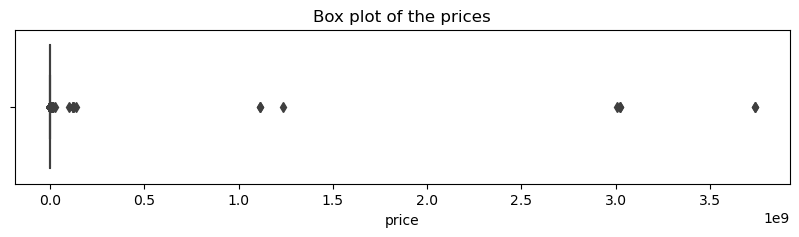

In [14]:
# Let's look at 'price' again. 

fig, ax = plt.subplots(figsize=(10,2))
ax.set_title('Box plot of the prices')
sns.boxplot(x='price', data = df)

**Observation:** There are a lot of free cars in the dataset, as well. Let's look into this more. 

In [15]:
# Filter df for rows where 'price' is 0 and select only 'price', 'id', and 'description' columns
zero_price_df = df[df['price'] == 0][['id', 'price', 'description']]
print(zero_price_df)

                id  price                                        description
46      7315039307      0  Call or text now 800-213-0336 Open 9:00-6:00pm...
126     7305672709      0  2018 Chevrolet Express Cargo Van RWD 2500 135"...
127     7305672266      0  2019 Chevrolet Express Cargo Van RWD 2500 135"...
128     7305672252      0  2018 Chevrolet Express Cargo Van RWD 2500 135"...
191     7316755272      0  2015 Nissan Sentra  by Benton Nissan of Oxford...
...            ...    ...                                                ...
426764  7303347225      0  ◄ PRICES STARTING AT $57,500 ($57,500 and up, ...
426812  7302877815      0  2006 *** TOYOTA SCION TC  ***    Call or Text ...
426832  7302353283      0  2004 *** TOYOTA PRIUS  ***    Call or Text "To...
426836  7302301268      0  Phone: 320-275-2150   2018 RAM 2500 Tradesman ...
426868  7301843288      0  2010 *** TOYOTA VENZA AWD V6  ***    Call or T...

[29243 rows x 3 columns]


**Observation:** Clearly, some of these values are faulty. Id #426764 say that prices start at 57500 but has a price of 0? Conflicting. 

C:\Users\oyund\AppData\Local\Temp\ipykernel_27792\3415923150.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['odometer'], ax = axs[0])


<Axes: title={'center': 'Box plot of the odometer'}, xlabel='odometer'>

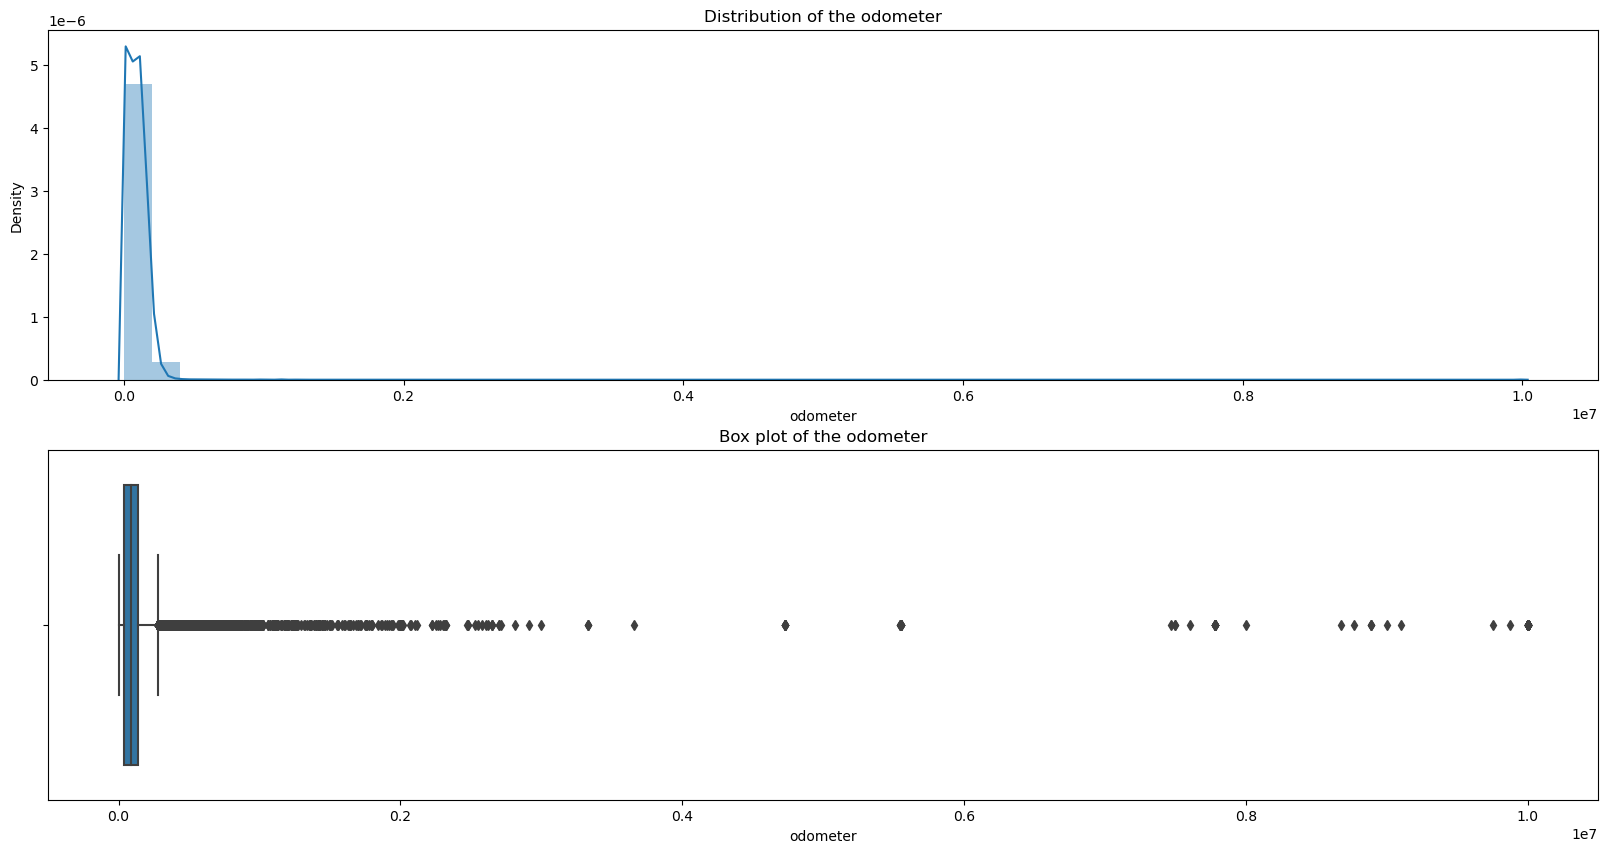

In [16]:
fig, axs = plt.subplots(2, figsize=(20,10))
sns.distplot(df['odometer'], ax = axs[0])
axs[0].set_title('Distribution of the odometer')
axs[1].set_title('Box plot of the odometer')
sns.boxplot(x='odometer', data = df, ax=axs[1])

In [17]:
# Let's look at the extreme odometers in detail using the detect_outliers function I defined above. 
# Function to detect outliers
small_odometer = detect_outliers(df, 'odometer', ['year', 'description'], n_outliers=5, ascending=True)
large_odometer = detect_outliers(df, 'odometer', ['year', 'description'], n_outliers=5, ascending=False)

print("Large outliers")
print(large_odometer) # print the top n_outliers 

print("Small Outliers")
print(small_odometer) # print the smallest n_outliers

Large outliers
          odometer    year                                        description
67003   10000000.0  2007.0  2007 Toyota Tundra  V/8 automatic 4.7  4door R...
105059  10000000.0  2010.0  Excellent condition looks good any questions p...
106192  10000000.0  2010.0  Excellent condition looks good any questions p...
106542  10000000.0  2010.0  Excellent condition looks good any questions p...
108102  10000000.0  2000.0  FLATBED TOW TRUCKS AVAILABLE 24/7 @ YOUR REQUE...
Small Outliers
        odometer    year                                        description
389570  280300.0  2003.0  No accidents, non smoking owner. Clean. Air-co...
175314  280319.0  2011.0  This GMC Sierra 2500 HD Crew Cab can be yours ...
221355  280319.0  2011.0  This GMC Sierra 2500 HD Crew Cab can be yours ...
306888  280319.0  2011.0  This GMC Sierra 2500 HD Crew Cab can be yours ...
366588  280319.0  2011.0  This GMC Sierra 2500 HD Crew Cab can be yours ...


**Observations:**

Maybe there is a cap at 10M? Is it even possible to reach 10M for mileage? So, I asked GPT to give me an answer on this: 

According to GPT, "while it is theoretically possible for a vehicle to have 10 million miles (10M) on the odometer, it is extraordinarily unlikely. Most personal vehicles are not designed to last for that many miles. Even with meticulous maintenance and overhauling, the wear and tear on a vehicle's engine and other components would typically prevent it from reaching such a high mileage."

Perhaps this is another way for sellers to let buyers know that the car has 'high' mileage or perhaps they don't want to input the actual value? 

<a id="4"></a>
### 4. Creating a Test Set to Prevent Data Snooping Bias
[Back to top](#head)

In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

# Create a copy of the training set for visualizations and gaining insights as needed in case
df_copy = train_set.copy()

<a id="4.1"></a>
### 4.1 The Full Preprocessing Pipeline 
[Back to top](#head)

In [19]:
# Check if 'price' column exists
if 'price' in train_set.columns and len(train_set['price']) > 1:
    # Compute IQR
    Q1, Q3 = np.percentile(train_set['price'], [25, 75])
    IQR = Q3 - Q1

    # Define the filter for outliers
    outlier_filter = ~((train_set['price'] < (Q1 - 1.5 * IQR)) | (train_set['price'] > (Q3 + 1.5 * IQR)))

    # Apply the filter
    init_size = len(train_set)
    train_set = train_set[outlier_filter]
    filtered_size = len(train_set)

    # Calculate and print the number of outliers removed
    outliers_removed = init_size - filtered_size
    print(f"{outliers_removed} ({outliers_removed / init_size:.2%}) outliers removed from dataset")
else:
    print("Dataset does not have 'price' column or contains insufficient data for outlier analysis.")

5912 (1.85%) outliers removed from dataset


In [20]:
def remove_below_threshold(train_set, column_name='price', min_price=500):
    return train_set[train_set[column_name] >= min_price]

train_set = remove_below_threshold(train_set, 'price')

In [21]:
Q1 = train_set['odometer'].quantile(0.25)
Q3 = train_set['odometer'].quantile(0.75)
IQR = Q3 - Q1
filter = ~((train_set['odometer'] < (Q1 - 1.5 * IQR)) | (train_set['odometer'] > (Q3 + 1.5 * IQR)))
init_size = train_set.count()['id']
train_set = train_set.loc[filter]  
filtered_size = train_set.count()['id']
print(init_size-filtered_size,'(', '{:.2f}'.format(100*(init_size-filtered_size)/init_size), '%',')', 'outliers removed from dataset')

2382 ( 0.84 % ) outliers removed from dataset


In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, cols_to_drop):
        self.cols_to_drop = cols_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(self.cols_to_drop, axis=1)

class MissingValueRowDropper(BaseEstimator, TransformerMixin):
    def __init__(self, cols_to_check):
        self.cols_to_check = cols_to_check

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.dropna(subset=self.cols_to_check)

class YearToAgeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, reference_year=2024, year_column='year'):
        self.reference_year = reference_year
        self.year_column = year_column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if self.year_column in X.columns:
            X['age'] = self.reference_year - X[self.year_column]
            X = X.drop(self.year_column, axis=1)
        return X

# Specify columns to drop and to check for missing values
cols_to_drop = ['county', 'size', 'model', 'id', 'posting_date', 'url', 'region', 'region_url', 'title_status', 
                'image_url', 'VIN', 'description', 'state', 'lat', 'long']
cols_to_check_for_missing = ['year', 'manufacturer', 'fuel', 'transmission', 'drive', 'type', 'paint_color']

# Create and apply the initial preprocessing steps
initial_preprocessing = Pipeline([
    ('drop_columns', ColumnDropper(cols_to_drop=cols_to_drop)),
    ('drop_missing_rows', MissingValueRowDropper(cols_to_check=cols_to_check_for_missing)), 
     ('year_to_age', YearToAgeTransformer())
])

train_set = initial_preprocessing.fit_transform(train_set)

In [23]:
X_train = train_set.drop("price", axis =1)
Y_train = train_set["price"].copy()

In [24]:
X_train.shape

(141990, 10)

In [25]:
Y_train.shape

(141990,)

**Missing Values Imputation Strategy**


Given the presence of numerous null values in the dataset, and considering the difficulty in accurately imputing these missing values, I have decided to implement the following three strategies:

1. Columns with a high percentage of missing values will be entirely eliminated. This applies to columns like "size" and "county".
2. Columns with a minimal amount of missing values will lead to the deletion of the respective rows. This is relevant for columns such as "year", "manufacturer", "model", "fuel", "transmission", "drive", "type", and "paint_color".
3. Columns with a moderate level of missing values, for instance, "condition" and "cylinders", will retain their missing values, which will be categorized under a distinct label named "null".

In [26]:
# preprocessing steps
preprocessing = Pipeline([
    ('transform_and_impute', ColumnTransformer([
        ('num', make_pipeline(SimpleImputer(strategy='median'), StandardScaler()), 
         make_column_selector(dtype_include=np.number)),
        ('cat', make_pipeline(SimpleImputer(strategy='constant', fill_value='null'), OneHotEncoder(handle_unknown='ignore')),
         make_column_selector(dtype_include=object))
    ]))
])

# Apply the remaining preprocessing steps
X_train_preprocessed = preprocessing.fit_transform(X_train)

In [27]:
print("Type:", type(X_train_preprocessed))
print("Shape:", X_train_preprocessed.shape)
#print(X_train_preprocessed[:5])

Type: <class 'scipy.sparse._csr.csr_matrix'>
Shape: (141990, 93)


<a id="5"></a>
### 5. Data Visualization for Insights
[Back to top](#head)

**Box Plot of Prices on Each Color**

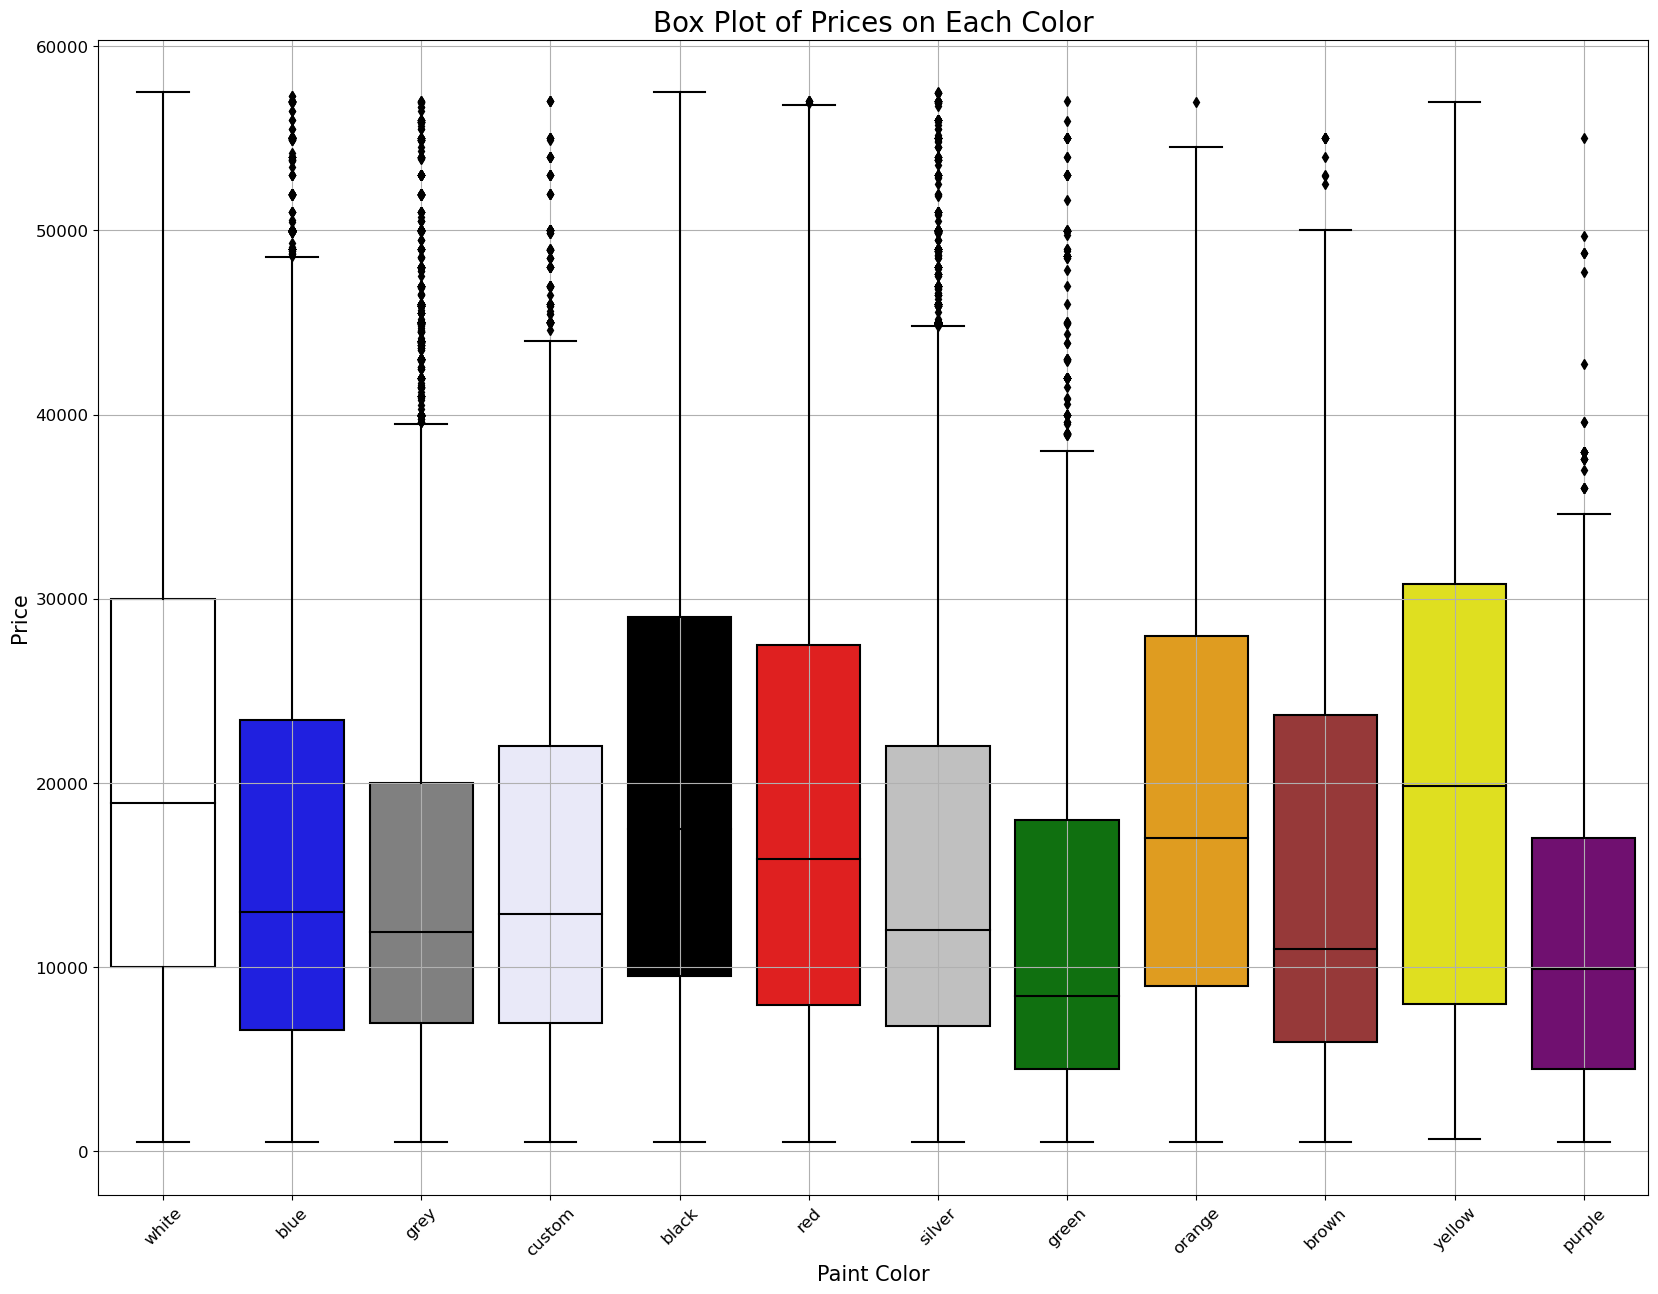

In [28]:
paint_color_palette = {
    'black': 'black',
    'silver': 'silver',
    'grey': 'grey',
    'white': 'white',
    'blue': 'blue',
    'red': 'red',
    'brown': 'brown', 
    'yellow': 'yellow',
    'green': 'green', 
    'orange': 'orange', 
    'purple': 'purple',
    'custom': '#e6e6fa'}

# Ensure the palette only contains colors that are present in the dataframe
palette_to_use = {color: code for color, code in paint_color_palette.items() if color in train_set['paint_color'].unique()}

fig, ax = plt.subplots(figsize=(20, 15))
ax.set_title('Box Plot of Prices on Each Color', fontsize=20)
sns.boxplot(x='paint_color', y='price', data=train_set, palette=palette_to_use)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Paint Color', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.grid(True)
plt.show()

The box plot indicates that there is a variation in car prices based on paint color. Notably, black, white, and yellow cars tend to have higher median prices, suggesting a potential preference for these colors in the market. Additionally, the spread of prices, as indicated by the longer whiskers for these colors, points to a wider range of prices within theses vehicles, which could include both standard and premium models.

**Box Plot of Prices on Each Car Type**

sedan          38547
SUV            34390
pickup         18655
truck          15169
coupe           7970
hatchback       6725
other           5401
wagon           5018
van             4073
convertible     3152
mini-van        2472
offroad          308
bus              110
Name: type, dtype: int64


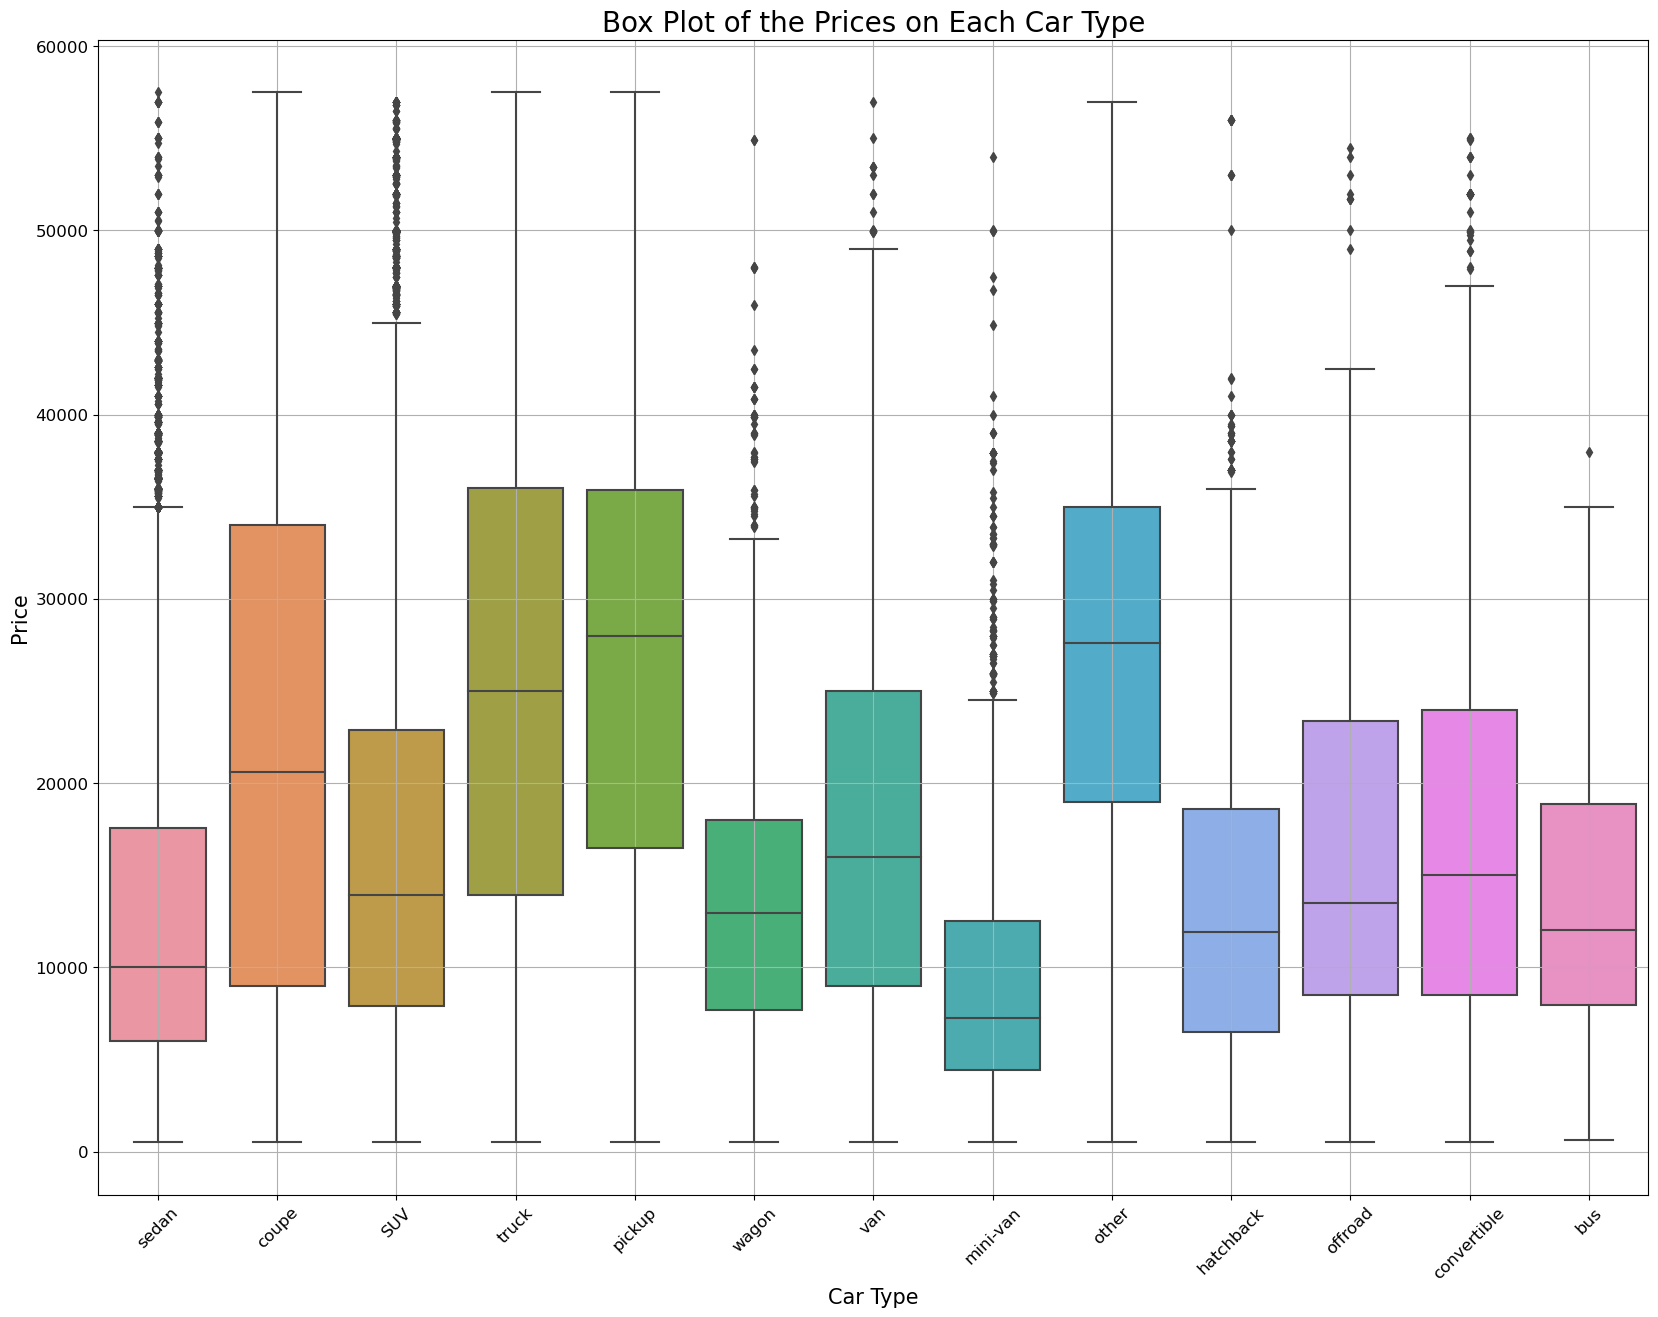

In [29]:
# Display car type counts
print(train_set['type'].value_counts())

# Adjusting the box plot for car types
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_title('Box Plot of the Prices on Each Car Type', fontsize=20)
sns.boxplot(x='type', y='price', data=train_set)

plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=12)
plt.xlabel('Car Type', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.grid(True)  # Add gridlines for better readability
plt.show()

Pickup vehicles and trucks tend to be priced at a premium, reflecting their higher initial purchase costs when new. In contrast, the pricing for sedans, wagons, hatchbacks, and mini-vans is more consistent, indicating a steadier market valuation for these types of vehicles.

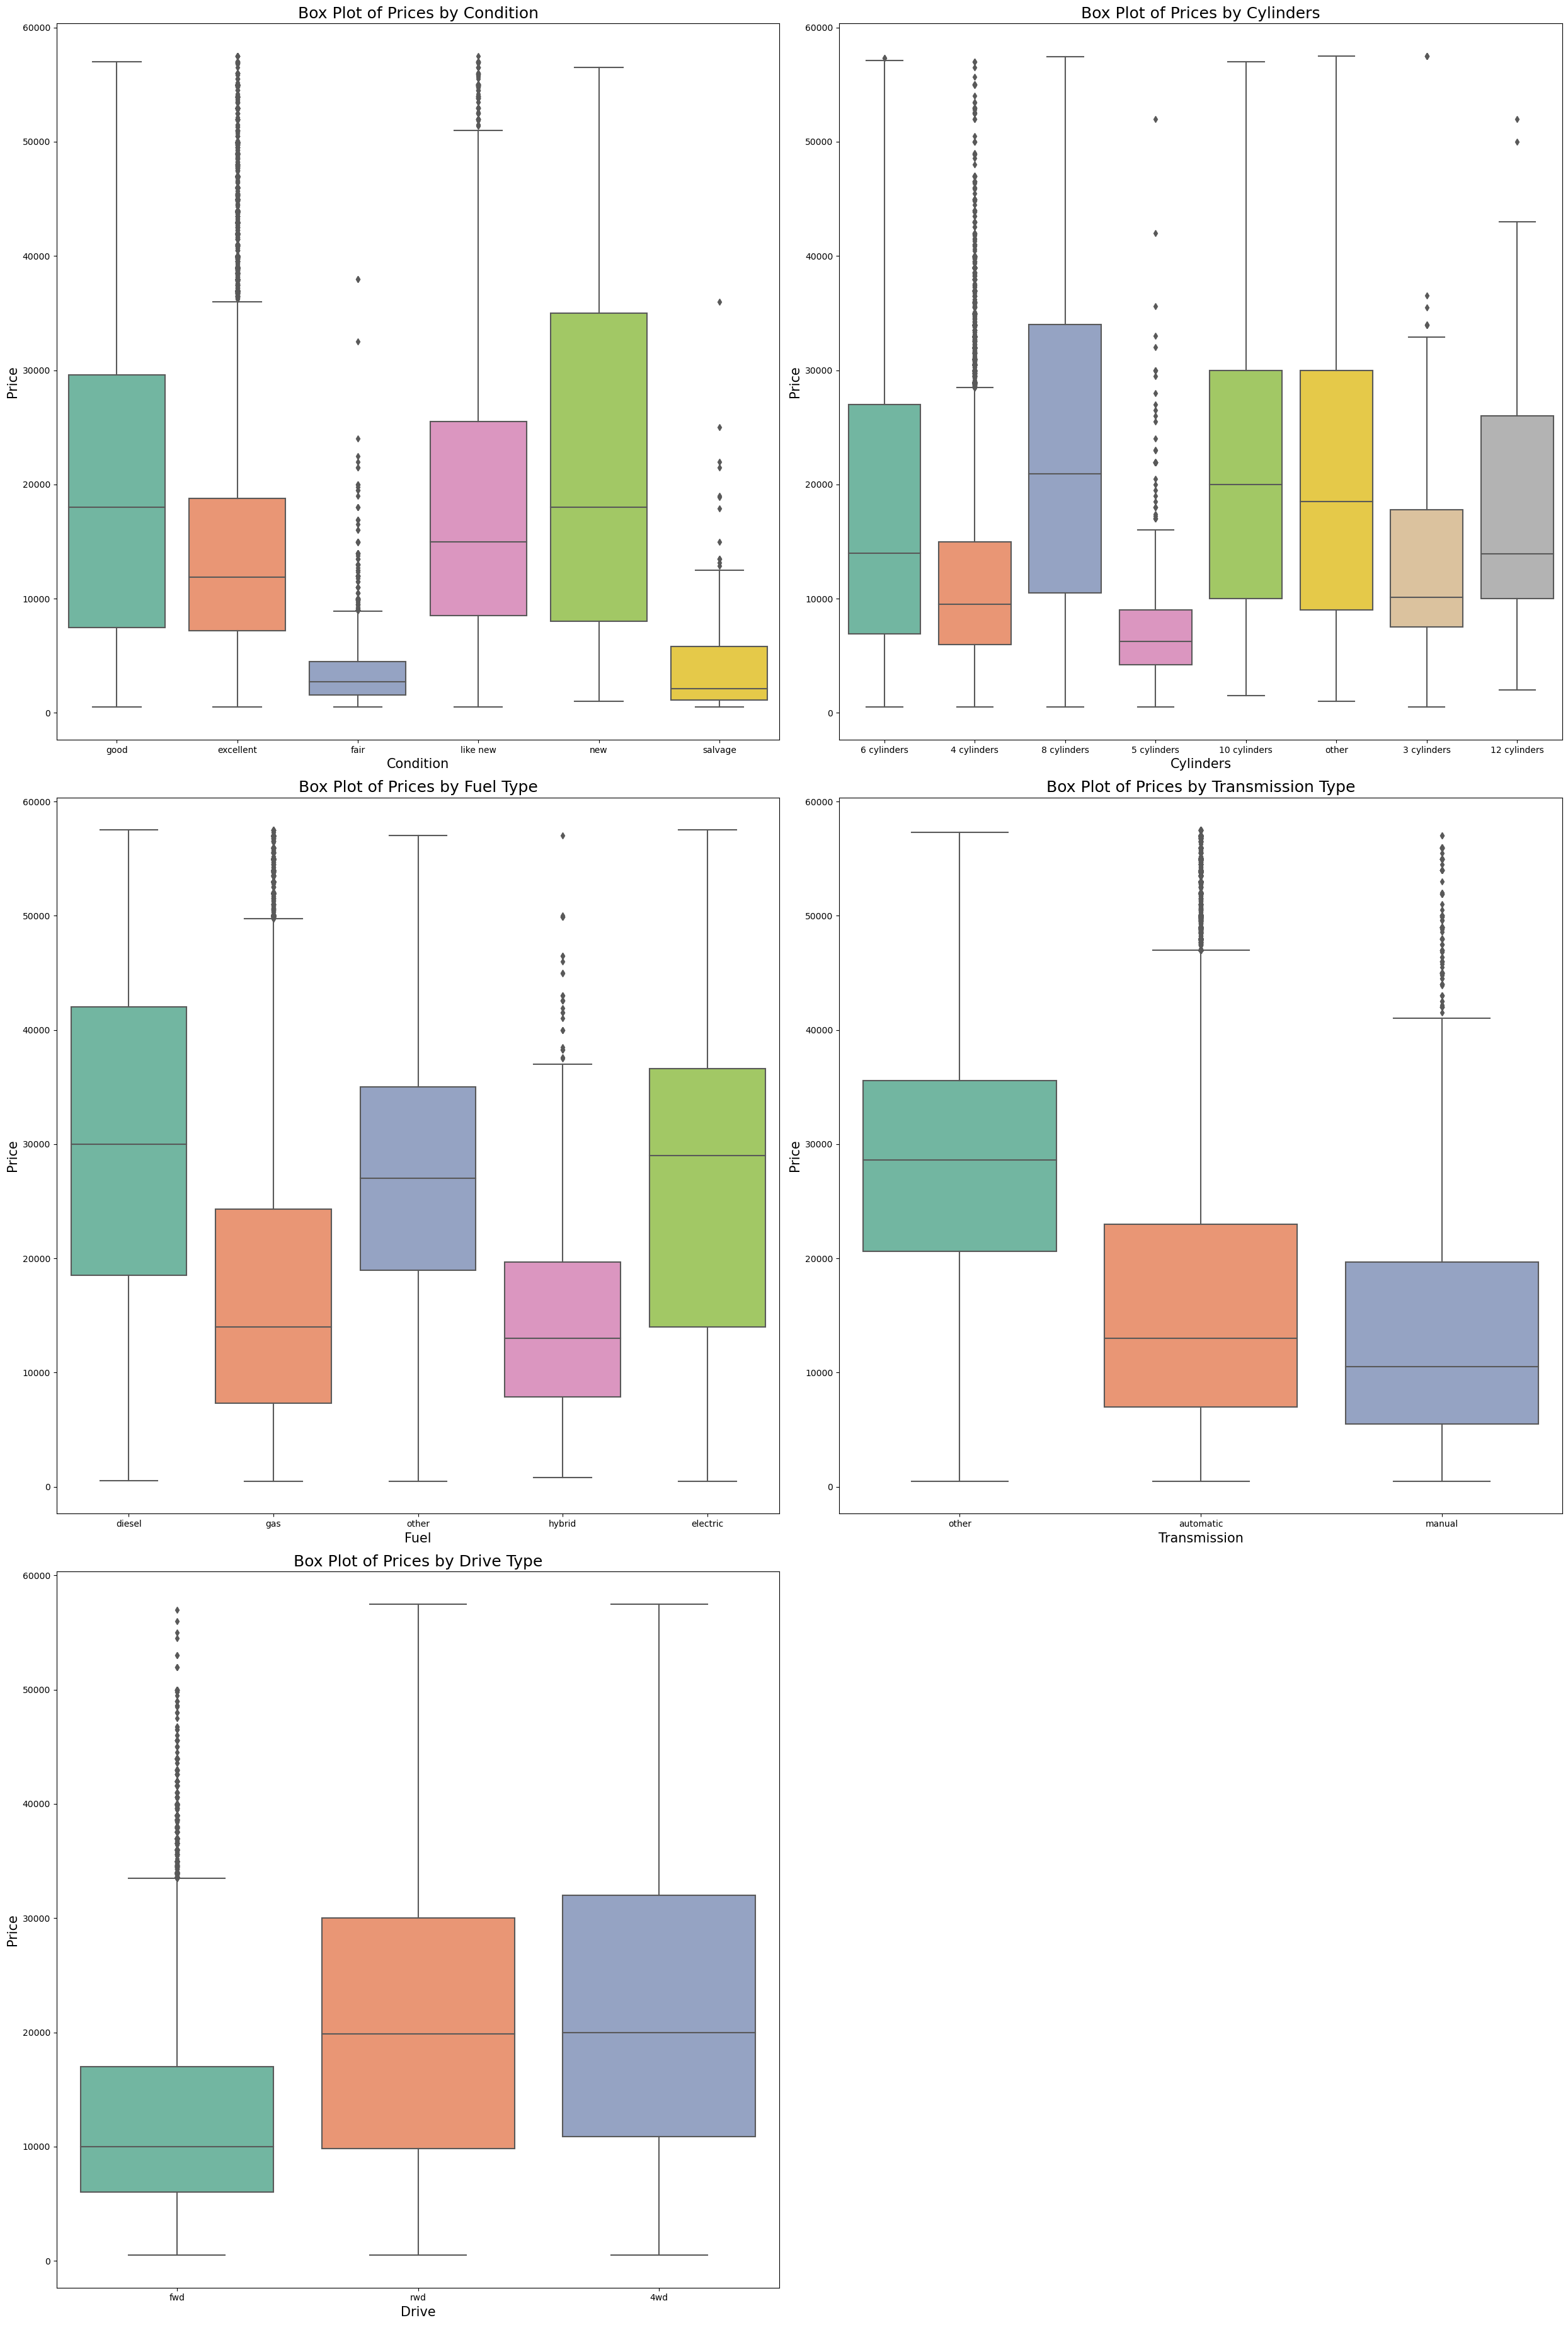

In [30]:
# Create a large figure to hold the subplots
fig = plt.figure(figsize=(25, 37))

# Custom color palette
palette = sns.color_palette("Set2")

# Boxplot for 'condition'
ax1 = fig.add_subplot(3, 2, 1)
sns.boxplot(x='condition', y='price', data=train_set, palette=palette)
ax1.set_title('Box Plot of Prices by Condition', fontsize=18)
ax1.set_xlabel('Condition', fontsize=15)
ax1.set_ylabel('Price', fontsize=15)

# Boxplot for 'cylinders'
ax2 = fig.add_subplot(3, 2, 2)
sns.boxplot(x='cylinders', y='price', data=train_set, palette=palette)
ax2.set_title('Box Plot of Prices by Cylinders', fontsize=18)
ax2.set_xlabel('Cylinders', fontsize=15)
ax2.set_ylabel('Price', fontsize=15)

# Boxplot for 'fuel'
ax3 = fig.add_subplot(3, 2, 3)
sns.boxplot(x='fuel', y='price', data=train_set, palette=palette)
ax3.set_title('Box Plot of Prices by Fuel Type', fontsize=18)
ax3.set_xlabel('Fuel', fontsize=15)
ax3.set_ylabel('Price', fontsize=15)

# Boxplot for 'transmission'
ax4 = fig.add_subplot(3, 2, 4)
sns.boxplot(x='transmission', y='price', data=train_set, palette=palette)
ax4.set_title('Box Plot of Prices by Transmission Type', fontsize=18)
ax4.set_xlabel('Transmission', fontsize=15)
ax4.set_ylabel('Price', fontsize=15)

# Boxplot for 'drive'
ax5 = fig.add_subplot(3, 2, 5)
sns.boxplot(x='drive', y='price', data=train_set, palette=palette)
ax5.set_title('Box Plot of Prices by Drive Type', fontsize=18)
ax5.set_xlabel('Drive', fontsize=15)
ax5.set_ylabel('Price', fontsize=15)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Observations:**

* Vehicles in new or nearly new condition command higher prices, whereas those listed in fair or salvage condition are markedly less costly.
* Automobiles featuring 6, 8, or 10 cylinders are generally associated with higher price points, in contrast to those with 4 or 5 cylinders, which are typically more affordable.
* Diesel-powered vehicles hold a price advantage over their gasoline and hybrid counterparts.
* Vehicles with transmissions categorized as "other," which may include continuously variable transmissions (CVTs), are often priced higher. Similarly, cars with automatic transmissions are priced above those with manual gearboxes.
* Vehicles outfitted with all-wheel-drive systems are usually priced above those with front-wheel-drive configurations.

**Scatterplot of prices by age, colored by drive type**

**Observations:**

* Most old cars are rear wheel drive
* Newer cars are mostly FWD and 4WD.
* Cars with 4WD seem to be more expensive than cars with FWD**, which is quite reasonable. There are still some expensive cars with RWD. This could be because RWD are equipped by many sports car nowadays.

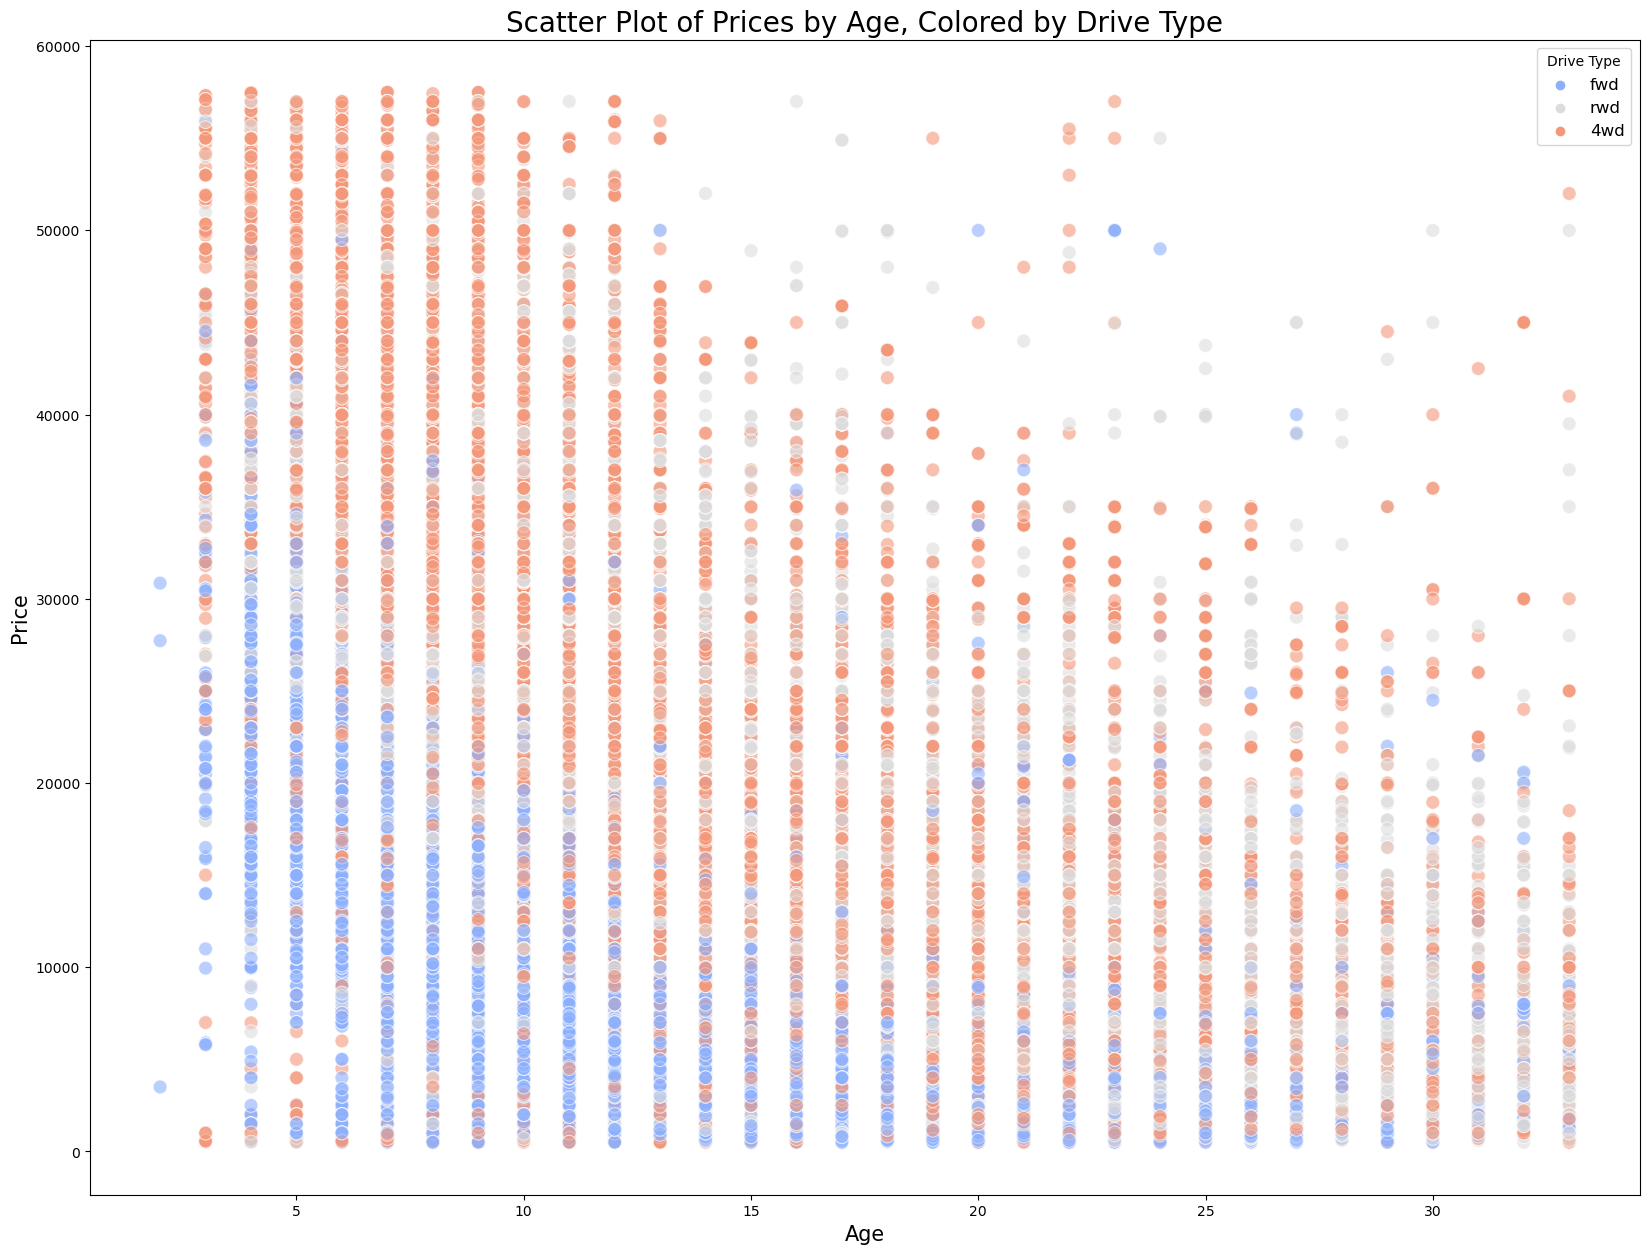

In [31]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_title('Scatter Plot of Prices by Age, Colored by Drive Type', fontsize=20)
sns.scatterplot(x='age', y='price', data=train_set, hue='drive', palette='coolwarm', alpha=0.6, s=100)
ax.legend(title='Drive Type', fontsize='large')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

**Scatterplot of prices by age, colored by fuel type**

**Observations:**

Gas and diesel are more prelavent. 

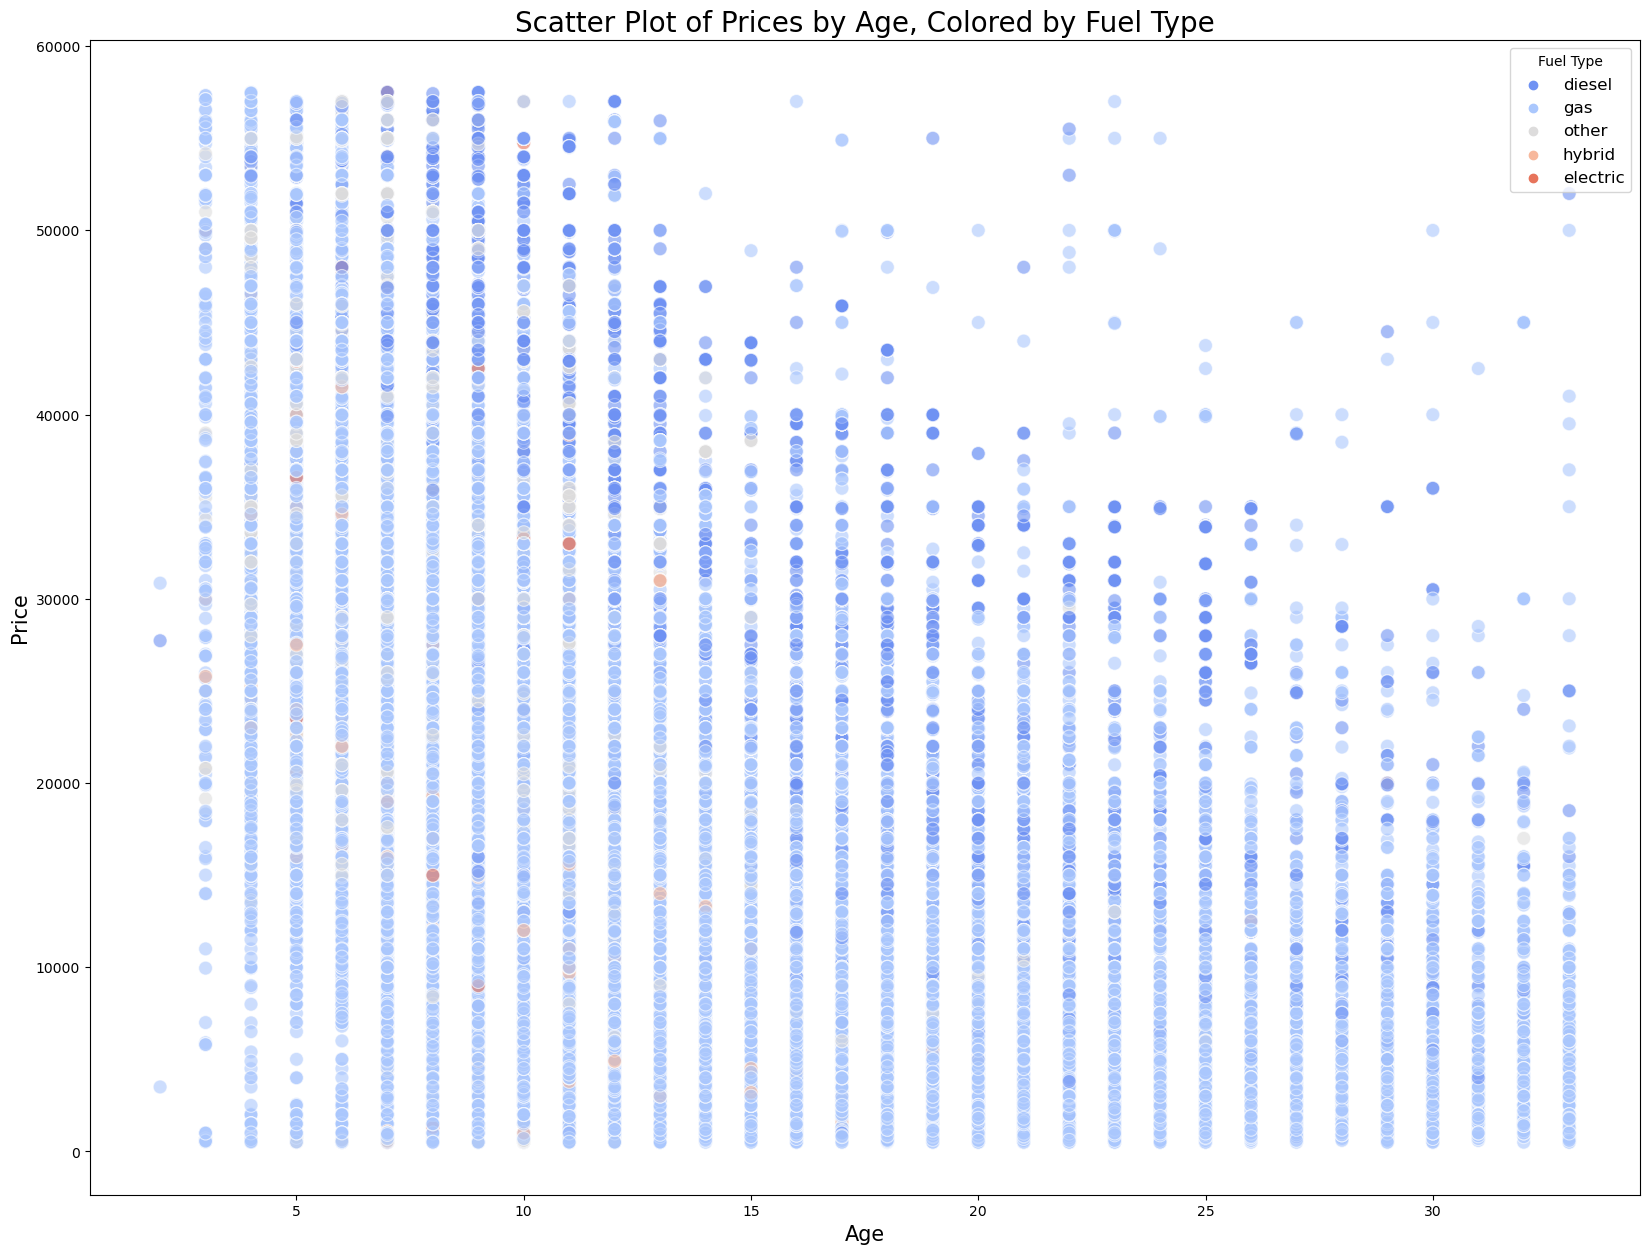

In [32]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_title('Scatter Plot of Prices by Age, Colored by Fuel Type', fontsize=20)
sns.scatterplot(x='age', y='price', data=train_set, hue='fuel', palette='coolwarm', alpha=0.6, s=100)
ax.legend(title='Fuel Type', fontsize='large')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

**Scatterplot of prices by age, colored by cylinder type**

**Observations:**

Newer cars are occupied by 6 and 8-cylinder cars and relatively cheap cars are mainly 4-cylinder type.

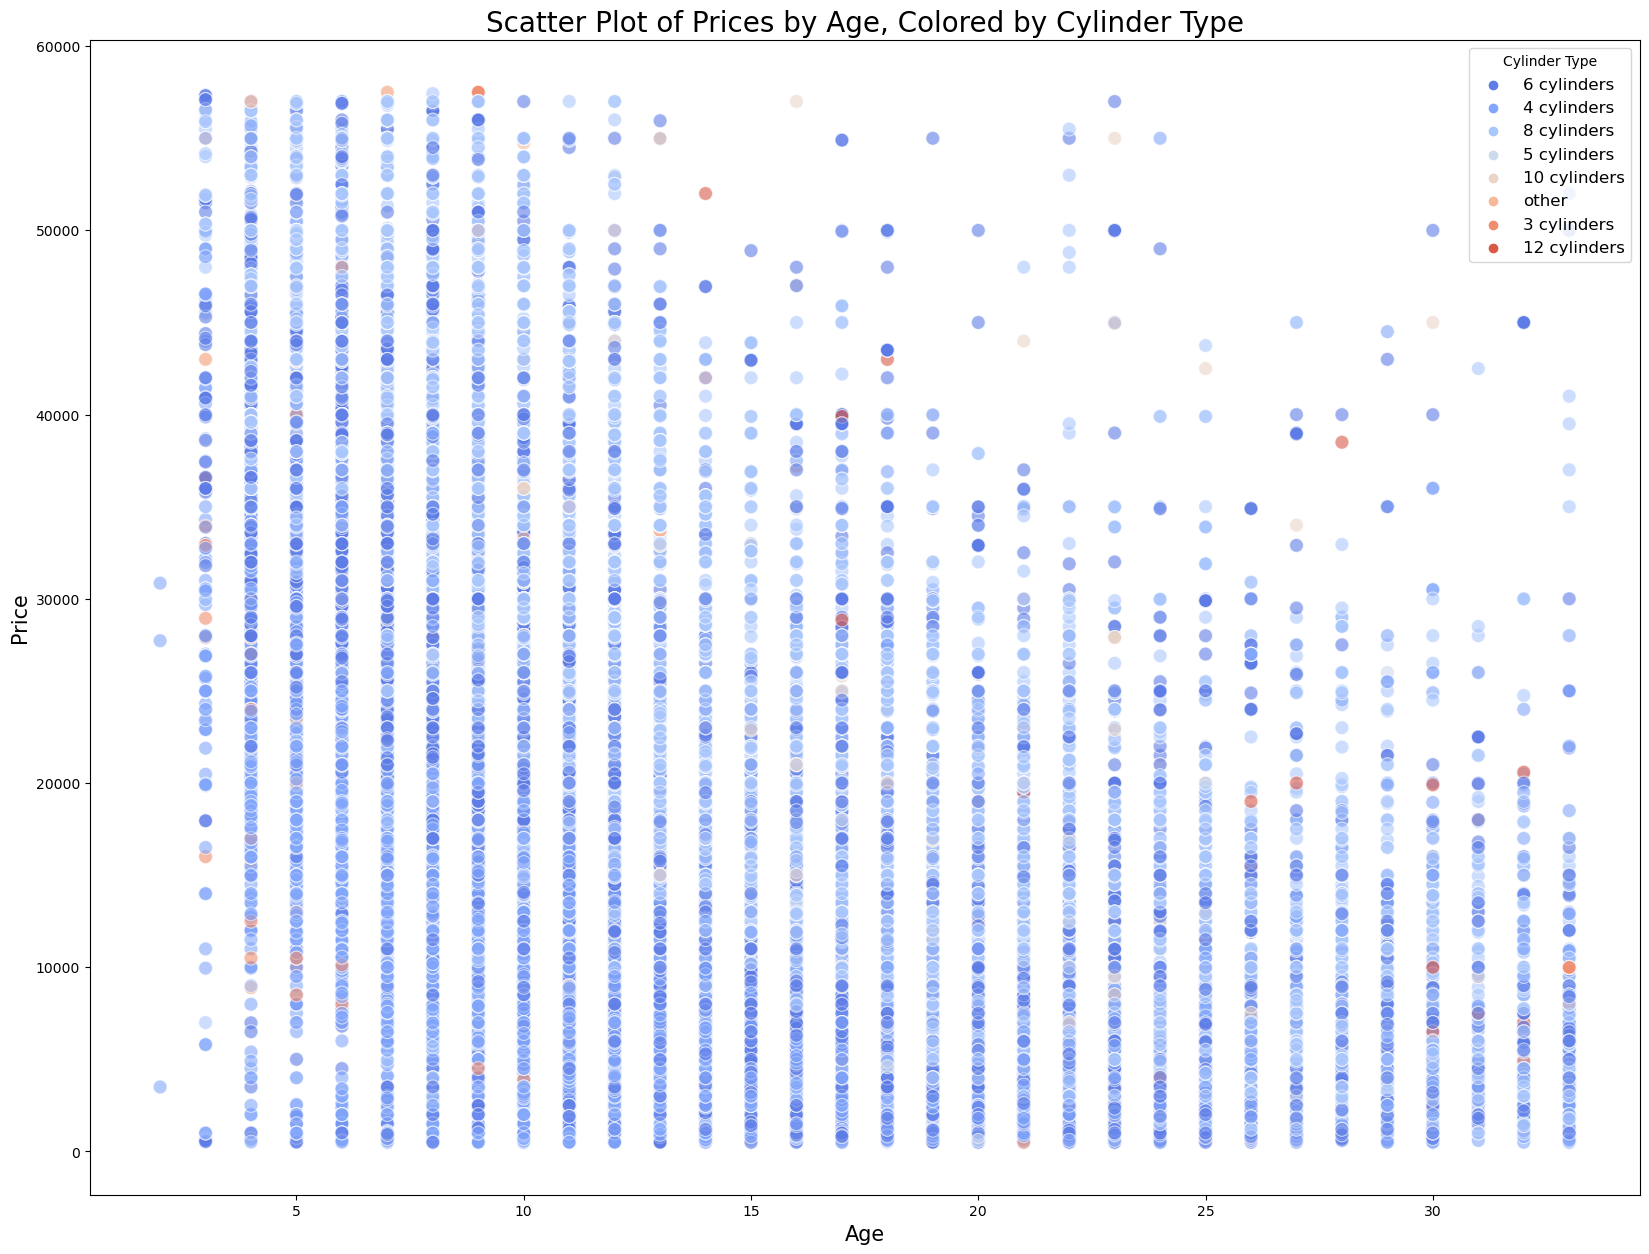

In [33]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_title('Scatter Plot of Prices by Age, Colored by Cylinder Type', fontsize=20)
sns.scatterplot(x='age', y='price', data=train_set, hue='cylinders', palette='coolwarm', alpha=0.6, s=100)
ax.legend(title='Cylinder Type', fontsize='large')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()


**Scatterplot of odometer by age, colored by car condition**

**Observations:**

* Newer vehicles haven't had the opportunity to rack up significant mileage, whereas older vehicles are often sold with lower mileage to maintain an attractive price in the second-hand market. 

* Interestingly, there doesn't appear to be a direct correlation between a car's condition and its odometer reading or age, an unexpected finding. This could be due to the subjective nature of how "condition" is assessed by different individuals.


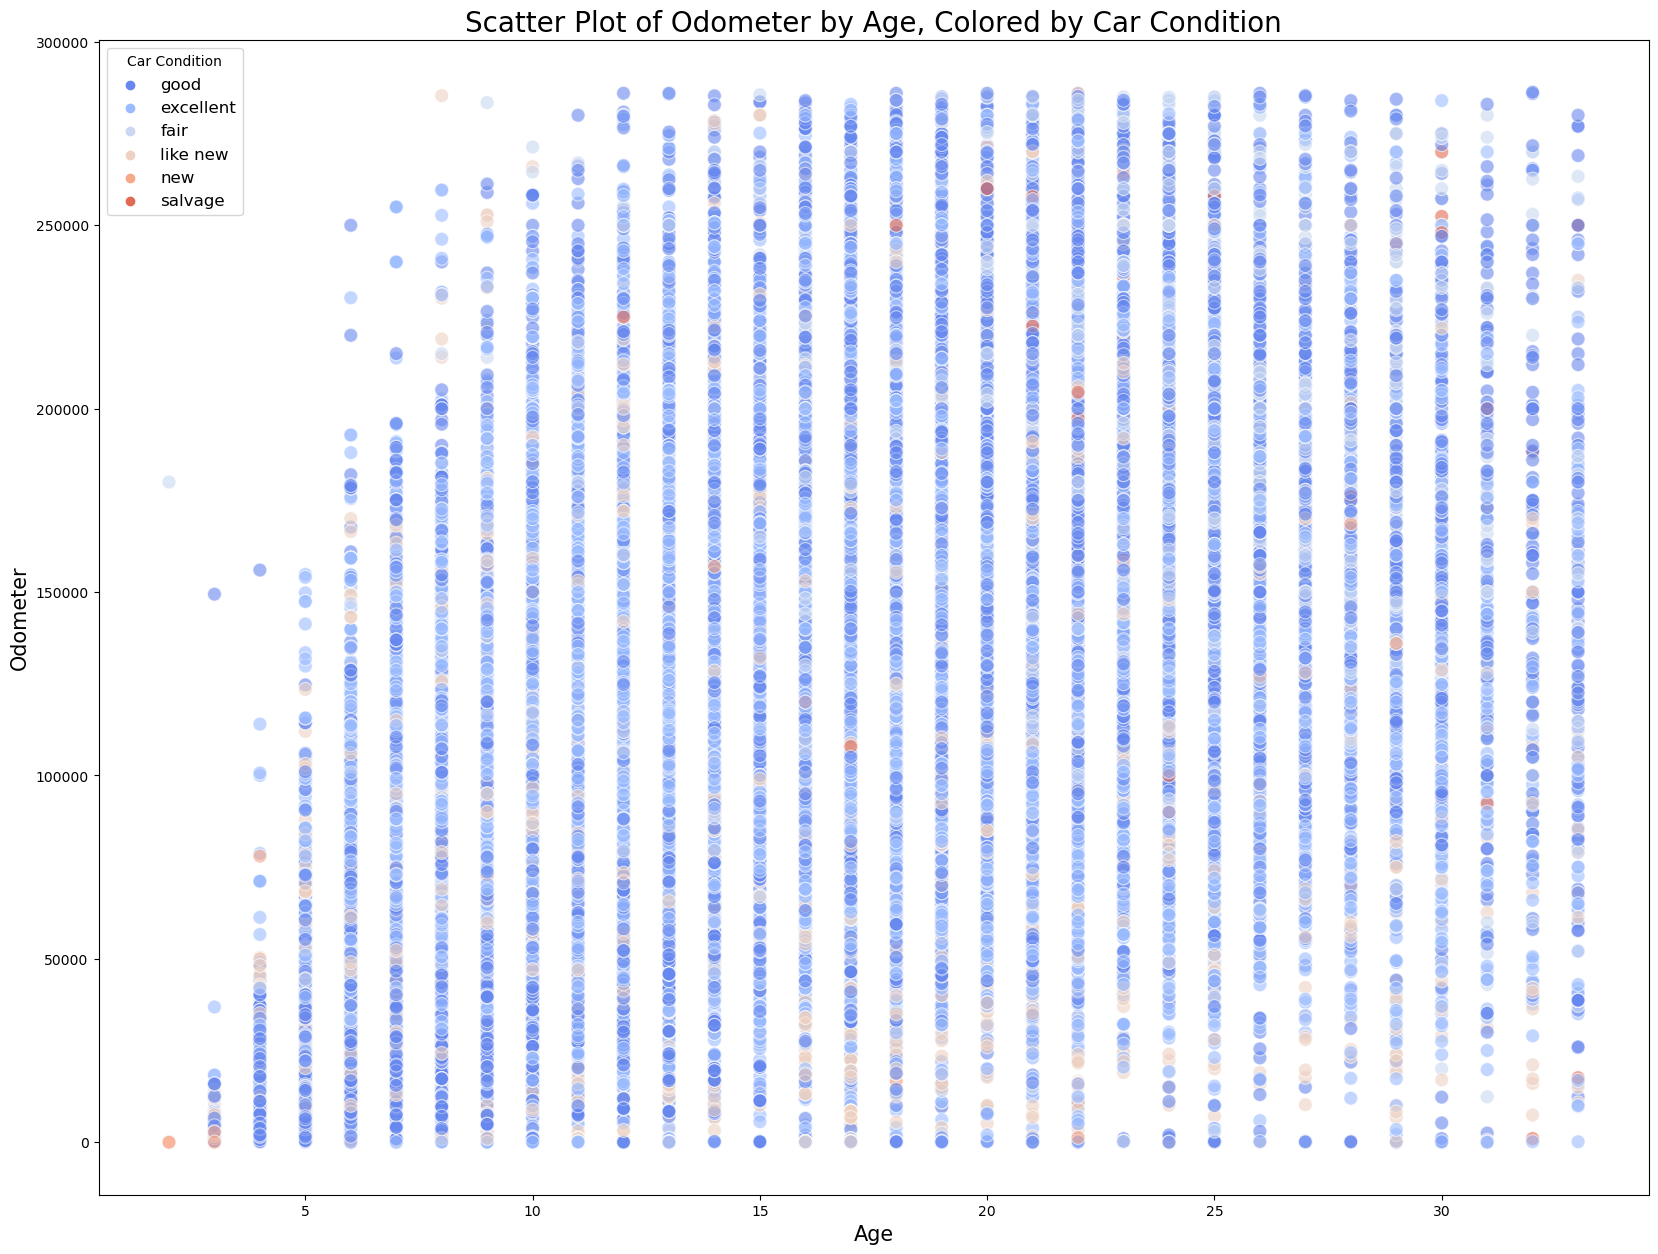

In [34]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_title('Scatter Plot of Odometer by Age, Colored by Car Condition', fontsize=20)
sns.scatterplot(x='age', y='odometer', data=train_set, hue='condition', palette='coolwarm', alpha=0.6, s=100)
ax.legend(title='Car Condition', fontsize='large')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Odometer', fontsize=15)
plt.show()


C:\Users\oyund\AppData\Local\Temp\ipykernel_27792\50995306.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_set.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)


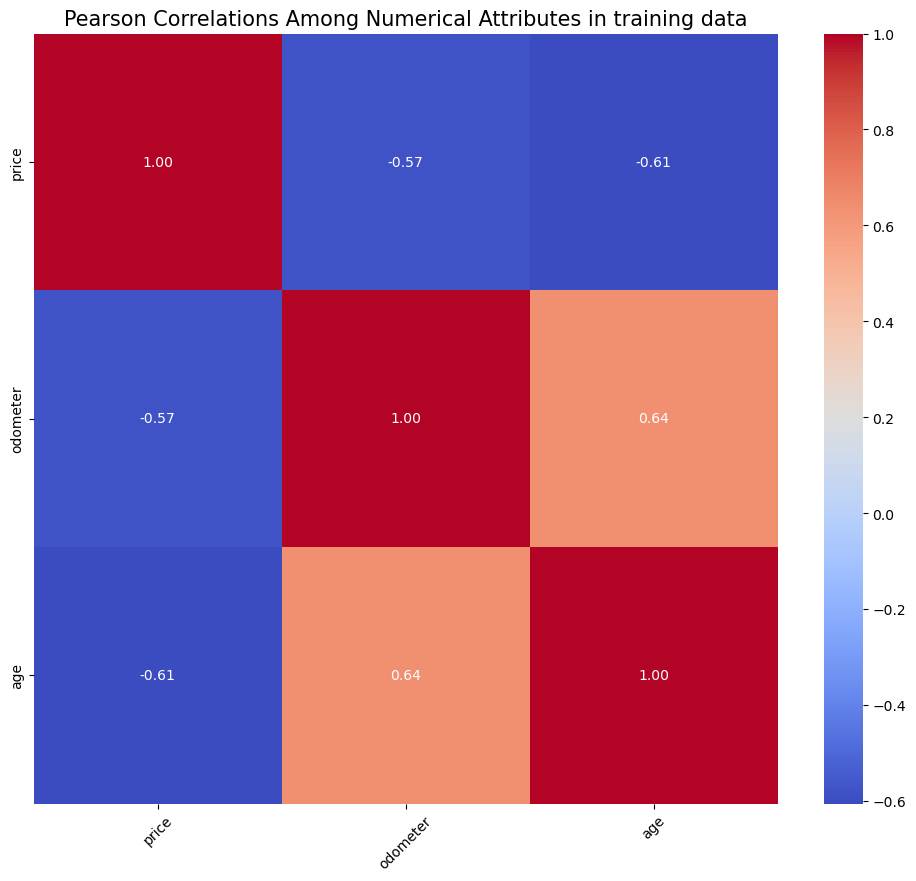

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 10))
ax.set_title('Pearson Correlations Among Numerical Attributes in training data', fontsize=15)

# Generate a heatmap with annotations
sns.heatmap(train_set.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=10)
plt.show()


<a id="6"></a>
### 6. Model Selection 
[Back to top](#head)

<a id="6.1"></a>
### 6.1. Linear Regression
[Back to top](#head)

In [36]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Assuming the Y_train is the original target variable with right-skewed distribution
Y_train_log = np.log1p(Y_train)  # Use log1p to deal with zero prices if they exist

# Fit the Linear Regression model using the log-transformed Y_train
lin_reg = LinearRegression()
lin_reg.fit(X_train_preprocessed, Y_train_log)

# Predict on the training data
df_predictions_log = lin_reg.predict(X_train_preprocessed)

# Inverse log transformation to get predictions in the original scale
df_predictions = np.expm1(df_predictions_log)  # Use expm1 which corresponds to log1p

# Calculate RMSE between the actual prices and the back-transformed predicted prices
lin_rmse = mean_squared_error(Y_train, df_predictions, squared=False)
print("Linear Regression RMSE on original price scale:", lin_rmse)

Linear Regression RMSE on original price scale: 6004.6269286961515


**Observations:**

This is better than nothing, but prediction error of $6004 is not very satisfying. This is an example of a model underfitting the training data. When this happens it can mean that the features did not provide enough infromation to make good predictions or that the model was not powerful enough. Some options: 

1. Select another model
2. Feed training algorithm with better features
3. Regularization

<a id="6.2"></a>
### 6.2. Decision Tree Regressor
[Back to top](#head)

In [37]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(X_train, Y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('transform_and_impute',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000022F116E7B50>),
                                                                  ('cat',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(fill_value='null',
                                                                                                  strategy='constant')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000022F115C74D0>)]))])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [38]:
df_predictions1 = tree_reg.predict(X_train)
tree_rmse = mean_squared_error(Y_train, df_predictions1, squared = False)

In [39]:
tree_rmse

131.63014238761036

It is more likely that the model has overfit the data. Need to use part of the training set for training and part of it for model validation.

<a id="6.2"></a>
### 6.2. Random Forest Regressor and Better Evaluations with Cross-Validation (CV)
[Back to top](#head)

In [40]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, 
                          RandomForestRegressor(n_estimators=20, 
                                                 max_depth=10, 
                                                 random_state=42, 
                                                 n_jobs=-1))

forest_rmses = -cross_val_score(forest_reg, X_train, Y_train, 
                               scoring = "neg_root_mean_squared_error", cv = 5)

In [41]:
pd.Series(forest_rmses).describe()

count       5.000000
mean     4973.757237
std        26.272184
min      4943.171883
25%      4960.012973
50%      4966.480896
75%      4988.335036
max      5010.785396
dtype: float64

<a id="6.3"></a>
### 6.3. Fine Tune the Model
[Back to top](#head)

In [42]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
import numpy as np

full_pipeline = Pipeline([
    ("preprocessing", preprocessing), 
    ("random_forest", RandomForestRegressor(random_state=42, n_jobs=-1))
])

# Use a smaller subset for tuning (because the dataset is big and requires some time)(Ideally, not do this)
subset_size = 10000  
X_train_subset = X_train.sample(n=subset_size, random_state=42)
Y_train_subset = Y_train[X_train_subset.index]

# Further limited parameter distribution for faster execution
param_distribs = {
    'random_forest__n_estimators': randint(low=10, high=50),   # Even fewer trees (if more resources available use more)
}

rnd_search = RandomizedSearchCV(full_pipeline, param_distributions=param_distribs, n_iter=3,  # Fewer iterations (similarly, if more resources, adjust as needed)
                               cv=2, scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(X_train_subset, Y_train_subset)


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('preprocessing',
                                              Pipeline(steps=[('transform_and_impute',
                                                               ColumnTransformer(transformers=[('num',
                                                                                                Pipeline(steps=[('simpleimputer',
                                                                                                                 SimpleImputer(strategy='median')),
                                                                                                                ('standardscaler',
                                                                                                                 StandardScaler())]),
                                                                                                <sklearn.compose._column_transformer.make_column_selector object at 0x0000022F116E7B50>),
                                                                                               ('cat',
                                                                                                Pipeli...
                                                                                                <sklearn.compose._column_transformer.make_column_selector object at 0x0000022F115C74D0>)]))])),
                                             ('random_forest',
                                              RandomForestRegressor(n_jobs=-1,
                                                                    random_state=42))]),
                   n_iter=3,
                   param_distributions={'random_forest__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022F118F6F50>},
                   random_state=42, scoring='neg_root_mean_squared_error')

<a id="6.4"></a>
### 6.4. Analyzing best model and its errors
[Back to top](#head)

In [43]:
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.14, 0.42, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.01, 0.01, 0.  , 0.  ,
       0.04, 0.  , 0.02, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.16, 0.  ,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  ])

In [44]:
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()), reverse=True)

[(0.42475856713547167, 'num__age'),
 (0.15716945277529776, 'cat__drive_fwd'),
 (0.13599759832527009, 'num__odometer'),
 (0.041653901648616626, 'cat__cylinders_4 cylinders'),
 (0.03883053338100014, 'cat__fuel_diesel'),
 (0.016037343801478688, 'cat__fuel_gas'),
 (0.01304786032062633, 'cat__cylinders_6 cylinders'),
 (0.00870493748785692, 'cat__type_truck'),
 (0.00848173488690398, 'cat__cylinders_8 cylinders'),
 (0.007302255005826139, 'cat__type_pickup'),
 (0.006281330280021046, 'cat__transmission_automatic'),
 (0.006275436665104294, 'cat__condition_null'),
 (0.006144633428650973, 'cat__type_SUV'),
 (0.005992370896141031, 'cat__manufacturer_toyota'),
 (0.004831002942086145, 'cat__type_sedan'),
 (0.00470554630969995, 'cat__drive_4wd'),
 (0.004700661559562545, 'cat__paint_color_white'),
 (0.004316147612819796, 'cat__condition_good'),
 (0.004279827704848206, 'cat__manufacturer_chevrolet'),
 (0.004236341547199047, 'cat__condition_excellent'),
 (0.004212920315851784, 'cat__drive_rwd'),
 (0.0040

Each feature is associated with a score that represents its importance in the model's prediction process:

* num_age: The'age' of a car is the most influential predictor of price.

* num_odometer: The odometer reading is the 3rd most significant factor in the model's predictions, indicating the mileage or usage of a vehicle.

and so on.

These features are likely used in a model related to vehicle pricing or condition assessment, where factors like age, drive type, mileage, engine size, and fuel type are typically significant predictors. The feature importance scores help in understanding which attributes most significantly affect the model's predictions, providing insights into the relationships learned from the training data.


### Something for future consideration if more resources available:

Can perhaps use sklearn.feature_selection.SelectFromModel transformer to automatically drop the least useful features. But generally, look at the specific errors that the system makes, then try to understand why it makes them and what could fix the problem. Is it adding extra features or getting rid of uninformative ones, cleaning up outliers, etc. (Source: Hands-on Learning with Sci-kit learn book)

<a id="7"></a>
### 7. Model Evaluation
[Back to top](#head)

<a id="7.1"></a>
### 7.1 Performance on the Test Set
[Back to top](#head)

**Unfortunately, this did not perform as expected. I am getting a mismatch in the sample size. Although I have tried my best to prevent data snooping bias or information leakage, this proves how important feature selection is. This might have happened because of the categorical encoding. More careful feature selection is likely to prevent this from occuring. For future work and improvement, fix this and be careful with it.**

In [45]:
test_set = initial_preprocessing.transform(test_set)
test_set.shape

(39110, 11)

In [47]:
test_set_copy = test_set.copy()

In [48]:
# Split X_test and y_test from the transformed test set
X_test = test_set_copy.drop("price", axis=1)
y_test = test_set_copy["price"].copy()

In [49]:
X_test.shape

(39110, 10)

In [50]:
X_test_preprocess = preprocessing.transform(X_test)

In [ ]:
X_test_preprocess.shape

In [54]:
X_test_preprocess_array = X_test_preprocess.toarray()

#X_test_preprocess_array[:5]

array([[ 0.22899641,  0.0209603 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1. 

In [ ]:
# Apply the second preprocessing pipeline to X_test
X_test_preprocessed = preprocessing.transform(X_test)

# Make predictions on the preprocessed test data
final_predictions = final_model.predict(X_test_preprocessed)

# Calculate RMSE
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

In [ ]:
X_test_preprocessed.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

<a id="7.2"></a>
### 7.2 Interpretability and Explanation
[Back to top](#head)

**Model Interpretation:**

The model's findings emphasize that a car's age is the most influential factor in determining its market value, with newer cars typically commanding higher prices. Mileage is another critical aspect, where cars with lower mileage tend to be valued higher. Other significant features include the type of drive and fuel, especially diesel, which reflect specific consumer preferences and perceived value in the market.

**Understanding RMSE:**

The RMSE values provide insights into the model's accuracy in predicting car prices. The Random Forest model's lower RMSE, in comparison to Linear Regression, indicates its superior ability in capturing the nuances of used car pricing. However, the presence of RMSE suggests there is potential for further model refinement to enhance the accuracy of the price estimates.

<a id="7.3"></a>
### 7.3 Future Work and Improvement
[Back to top](#head)

1. Further or Additional Feature Engineering: This could have been a critical step if I have decided to deal with high-cardinality features like 'model.' Considering this for future work and improvement. Given that 'model' can have numerous unique values, techniques like NLP (Natural Language Processing) can help extract more meaningful features from these text data. For instance, tokenizing model names and using TF-IDF (Term Frequency-Inverse Document Frequency) can help in identifying which aspects of the model names are most relevant for predicting prices.

2. Dimensionality Reduction: High cardinality can lead to a large number of features after one-hot encoding. Dimensionality reduction techniques like PCA (Principal Component Analysis) can be used to reduce the number of features while retaining most of the variance in the data.

3. Feature Interaction: Creating new features that are interactions of existing ones can sometimes reveal patterns that are not captured by individual features. For example, an interaction feature between 'age' and 'odometer' might provide more insight into the vehicle's condition than either feature alone.

4. Regularization Techniques: Regularization techniques are used to prevent overfitting, especially in models with a large number of features. Some possible options: Lasso Regression (L1 Regularization) adds a penalty equal to the absolute value of the magnitude of coefficients. It can lead to feature selection since some coefficients can become zero. Ridge Regression (L2 Regularization) adds a penalty equal to the square of the magnitude of coefficients. This method is less severe in setting coefficients to zero but shrinks them towards zero. Last, Elastic Net which is considered a middle ground between Lasso and Ridge. It combines both penalties and can be particularly effective when there are correlations between features.

5. Experimentation with Parameter Tuning: Expanding the search space in hyperparameter tuning can lead to better-performing models. Grid Search: A methodical approach that evaluates a model for every combination of parameters specified in a grid. This can be computationally expensive but thorough. Random Search: Involves randomly selecting combinations of parameters to try, which can be more efficient than Grid Search, especially when dealing with a large search space. Or Bayesian Optimization: An advanced technique that uses a probabilistic model to guide the search for the best hyperparameters.

6. Advanced Techniques for Missing Data: For columns with moderate missing data, advanced imputation techniques can provide more accurate estimates. Doing further research on best practices. 

7. Post-Model Analysis: Analyzing the model's residuals (the differences between observed and predicted values) can reveal systematic errors. Could do residual Plots: Plotting residuals against predicted values or other variables can reveal patterns indicating non-linearity, heteroscedasticity (non-constant variance), or outliers. Doing further research on best practices. 

Each of these suggestions aims to refine the  model further and ensure that it not only predicts accurately but also generalizes well to new, unseen data.

In [ ]:
import joblib

joblib.dump(final_model, "used_car_predictions.pkl")